In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import glob

The cell below takes a file path on your computer which contains all the csv files containing the energy data, then reads each file and concatenates them all into 1 big data frame. 
For the code to work, the file path must be changed and updated for each person's computer

In [2]:
energy_path = "/Users/Aden/Desktop/SEM22023/ADS1002/project_files"
csv_files = glob.glob(energy_path + "/*.csv")
df_list1 = (pd.read_csv(file) for file in csv_files)
energy = pd.concat(df_list1, ignore_index=True)
energy.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,NSW1,2000/09/01 00:30,8117.23667,36.72,TRADE
1,NSW1,2000/09/01 01:00,7799.70000,32.92,TRADE
2,NSW1,2000/09/01 01:30,7453.99000,27.84,TRADE
3,NSW1,2000/09/01 02:00,7095.55333,30.62,TRADE
4,NSW1,2000/09/01 02:30,6786.22167,33.53,TRADE


In [3]:
weather_path_aden = "/Users/Aden/Desktop/SEM22023/ADS1002/project_files/"
weather1 = pd.read_csv(weather_path_aden + "HM01X_Data_023090_999999999743964.txt", low_memory=False)
weather2 = pd.read_csv(weather_path_aden +"HM01X_Data_040913_999999999743964.txt", low_memory=False)
weather3 = pd.read_csv(weather_path_aden +"HM01X_Data_066062_999999999743964.txt", low_memory=False)
weather4 = pd.read_csv(weather_path_aden +"HM01X_Data_086071_999999999743964.txt", low_memory=False)
weather5 = pd.read_csv(weather_path_aden +"HM01X_Data_086338_999999999743964.txt", low_memory=False)
weather6 = pd.read_csv(weather_path_aden +"HM01X_Data_094029_999999999743964.txt", low_memory=False)

weather = pd.concat([weather1, weather2, weather3, weather4, weather5, weather6])

In [4]:
energy.columns = ['State', 'Date_Time', 'Total_Demand', 'RRP', 'p']
energy.drop(columns = 'p', inplace = True)
#energy.set_index('Date_Time', inplace = True)
energy.dtypes
energy = energy.set_index(pd.to_datetime(energy["Date_Time"]))

In [168]:
rooftop = pd.read_csv("/Users/Aden/Desktop/SEM22023/ADS1002/project_files/Rooftop PV data_1.csv")
rooftop.set_index(rooftop['Unnamed: 0'], inplace = True)
rooftop

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Aden/Desktop/SEM22023/ADS1002/project_files/Rooftop PV data_1.csv'

# Cleaning weather data
(Riley 15/08)

In [5]:
weather

,hm,Station Number,Year Month Day Hour Minutes in YYYY,MM,DD,HH24,MI format in Local time,Year Month Day Hour Minutes in YYYY.1,MM.1,DD.1,...,Wind direction in degrees true,Wind direction quality,Speed of maximum windgust in last 10 minutes in km/h,Quality of speed of maximum windgust in last 10 minutes,Mean sea level pressure in hPa,Quality of mean sea level pressure,Station level pressure in hPa,Quality of station level pressure,AWS Flag,#
0,hm,23090,2000,1,1,1,0,2000,1,1,...,190,N,24.1,N,1018.9,N,1012.8,N,,#
1,hm,23090,2000,1,1,1,30,2000,1,1,...,200,N,16.6,N,1018.7,N,1012.6,N,,#
2,hm,23090,2000,1,1,2,0,2000,1,1,...,180,N,20.5,N,1018.5,N,1012.4,N,,#
3,hm,23090,2000,1,1,2,30,2000,1,1,...,170,N,18.4,N,1018.3,N,1012.2,N,,#
4,hm,23090,2000,1,1,3,0,2000,1,1,...,150,N,20.5,N,1018.3,N,1012.2,N,,#
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386357,hm,94029,2020,1,20,8,0,2020,1,20,...,130,N,20.5,N,1011.4,N,1005.3,N,1,#
386358,hm,94029,2020,1,20,8,30,2020,1,20,...,140,N,18.4,N,1011.5,N,1005.4,N,1,#
386359,hm,94029,2020,1,20,9,0,2020,1,20,...,150,N,24.1,N,1011.7,N,1005.6,N,1,#
386360,hm,94029,2020,1,20,9,30,2020,1,20,...,150,N,22.3,N,1011.6,N,1005.5,N,1,#


In [6]:
#useless column
weather.drop(columns = ["hm"], inplace = True)

#94029 Hobart
#23090 Adelaide
#40913 Brisbane
#66062 Sydney 
#86071 Melbourne Regional Office
#86338 Melbourne Olympic Park

#replace weather station numbers with the station locations
weather["Station Number"].replace(
    to_replace = {94029:"Hobart", 
                  23090:"Adelaide", 
                  40913:"Brisbane", 
                  66062:"Sydney", 
                  86071:"Melbourne Regional", 
                  86338:"Melbourne Olympic Park"}, 
    inplace = True)
weather.rename(columns = {"Station Number":"Location"}, inplace=True)

In [7]:
#quality columns do not have any importance
weather["Wind direction quality"].unique()

array(['N', ' '], dtype=object)

In [8]:
#get all quality columns for removal
quality_columns = []
for col in list(weather.columns):
    if "quality" in col.lower():
        quality_columns.append(col)
print(quality_columns) 

['Quality of precipitation since 9am local time', 'Quality of air temperature', 'Quality of Wet bulb temperature', 'Quality of dew point temperature', 'Quality of relative humidity', 'Wind speed quality', 'Wind direction quality', 'Quality of speed of maximum windgust in last 10 minutes', 'Quality of mean sea level pressure', 'Quality of station level pressure']


In [9]:
#remove quailty columns
weather.drop(columns = quality_columns, inplace= True)

In [10]:
#rename date columns
weather.rename(columns={'DD':'Day', 
                        "MM":"Month", 
                        "Year Month Day Hour Minutes in YYYY":"Year", 
                        "HH24":"Hour", 
                        "MI format in Local standard time":"Minute"}, 
               inplace = True)
#create time column in 00:00:00 format
weather["Time"] = weather['Hour'].astype(str).str.pad(2,fillchar='0') + ":" + weather['Minute'].astype(str).str.pad(2,fillchar='0')+ ":00"

weather["Time"]

0         01:00:00
1         01:30:00
2         02:00:00
3         02:30:00
4         03:00:00
            ...   
386357    08:00:00
386358    08:30:00
386359    09:00:00
386360    09:30:00
386361    10:00:00
Name: Time, Length: 1826244, dtype: object

In [11]:
#create Datetime column using all date and time columns
weather['Datetime'] = pd.to_datetime(weather[['Day','Month','Year']]) + \
                 pd.to_timedelta(weather["Time"])

In [12]:
weather['Datetime']

0        2000-01-01 01:00:00
1        2000-01-01 01:30:00
2        2000-01-01 02:00:00
3        2000-01-01 02:30:00
4        2000-01-01 03:00:00
                 ...        
386357   2020-01-20 08:00:00
386358   2020-01-20 08:30:00
386359   2020-01-20 09:00:00
386360   2020-01-20 09:30:00
386361   2020-01-20 10:00:00
Name: Datetime, Length: 1826244, dtype: datetime64[ns]

In [13]:
#remove date and time columns
weather.drop(columns = ["Year", 
                        "Month", 
                        "Day", 
                        "Hour", 
                        "Minute", 
                        "Time", 
                        "Year Month Day Hour Minutes in YYYY.1", 
                        "MM.1", 
                        "DD.1", 
                        "HH24.1", 
                        "MI format in Local time"], inplace = True)

In [14]:
weather

,Location,Precipitation since 9am local time in mm,Air Temperature in degrees C,Wet bulb temperature in degrees C,Dew point temperature in degrees C,Relative humidity in percentage %,Wind speed in km/h,Wind direction in degrees true,Speed of maximum windgust in last 10 minutes in km/h,Mean sea level pressure in hPa,Station level pressure in hPa,AWS Flag,#,Datetime
0,Adelaide,0.0,13.1,10.0,6.6,65,14.8,190,24.1,1018.9,1012.8,,#,2000-01-01 01:00:00
1,Adelaide,0.0,13.2,10.1,6.8,65,9.4,200,16.6,1018.7,1012.6,,#,2000-01-01 01:30:00
2,Adelaide,0.0,13.4,10.1,6.5,63,13.0,180,20.5,1018.5,1012.4,,#,2000-01-01 02:00:00
3,Adelaide,0.0,13.2,10.0,6.5,64,9.4,170,18.4,1018.3,1012.2,,#,2000-01-01 02:30:00
4,Adelaide,0.0,13.0,9.7,6.0,62,11.2,150,20.5,1018.3,1012.2,,#,2000-01-01 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386357,Hobart,0.0,14.9,12.5,10.3,74,14.8,130,20.5,1011.4,1005.3,1,#,2020-01-20 08:00:00
386358,Hobart,0.0,14.9,12.4,10.1,73,13.0,140,18.4,1011.5,1005.4,1,#,2020-01-20 08:30:00
386359,Hobart,0.0,14.9,12.4,10.1,73,16.6,150,24.1,1011.7,1005.6,1,#,2020-01-20 09:00:00
386360,Hobart,0.0,15.1,12.4,9.9,71,16.6,150,22.3,1011.6,1005.5,1,#,2020-01-20 09:30:00


# Angus
22/08

In [15]:
weather.isna().sum() #check for any missing values. Fortunately there are none. 

Location                                                 0
Precipitation since 9am local time in mm                 0
Air Temperature in degrees C                             0
Wet bulb temperature in degrees C                        0
Dew point temperature in degrees C                       0
Relative humidity in percentage %                        0
Wind speed in km/h                                       0
Wind direction in degrees true                           0
Speed of maximum windgust in last 10 minutes in  km/h    0
Mean sea level pressure in hPa                           0
Station level pressure in hPa                            0
AWS Flag                                                 0
#                                                        0
Datetime                                                 0
dtype: int64

In [16]:
energy.isna().sum() # no missing values in the energy data either

State           0
Date_Time       0
Total_Demand    0
RRP             0
dtype: int64

In [17]:
weather.set_index(weather['Datetime'], inplace = True) # sets the index to the datetime column
# weather.drop(columns = 'Datetime', inplace = True)
# sets the index to the datetime column then removes the datetime column
# have not decided if this is a good idea yet as it is sometimes easier to run code on datetime if its a column

The cell below checks where the data from each weather station starts and ends. The ones that stick out are:

Melbourne Olympic Park which starts getting data on the 31st of May 2013 and continues until 20th of January 2020 (same as others)

Melbourne Regional which starts at the same time as the others but no longer has data post the 6th of January 2015

In [18]:
location = weather['Location'].unique()
print(location)
weather_end = []
weather_start = []
for city in location:
    weather_city = weather[weather['Location'] == city]
    weather_start.append(weather_city['Datetime'].max())
    weather_end.append(weather_city['Datetime'].min())
    # print('The max in', city, 'is', weather_city['Datetime'].max())
    # print('The min in', city, 'is', weather_city['Datetime'].min())
print('The latest common ending point is', weather_start)
print('The earliest common starting point is', weather_end)

['Adelaide' 'Brisbane' 'Sydney' 'Melbourne Regional'
 'Melbourne Olympic Park' 'Hobart']
The latest common ending point is [Timestamp('2020-01-20 09:30:00'), Timestamp('2020-01-20 09:00:00'), Timestamp('2020-01-20 10:00:00'), Timestamp('2015-01-06 09:00:00'), Timestamp('2020-01-20 10:00:00'), Timestamp('2020-01-20 10:00:00')]
The earliest common starting point is [Timestamp('2000-01-01 01:00:00'), Timestamp('2000-01-01 00:00:00'), Timestamp('2000-01-01 01:00:00'), Timestamp('2000-01-01 01:30:00'), Timestamp('2013-05-31 15:00:00'), Timestamp('2000-01-01 02:00:00')]


### Aden ###

In [19]:
weather_summer = weather[weather['Datetime'].dt.month.isin([12,1,2])].copy() 
# checks if datetime month number is in list of summer months and creates dataframe
weather_summer.rename(columns={'Datetime': 'Datetime_summer'}, inplace = True)

weather_autumn = weather[weather['Datetime'].dt.month.isin([3,4,5])].copy()
weather_autumn.rename(columns={'Datetime': 'Datetime_autumn'}, inplace = True)

weather_winter = weather[weather['Datetime'].dt.month.isin([6,7,8])].copy()
weather_winter.rename(columns={'Datetime': 'Datetime_winter'}, inplace = True)

weather_spring = weather[weather['Datetime'].dt.month.isin([9,10,11])].copy()
weather_spring.rename(columns={'Datetime': 'Datetime_spring'}, inplace = True)

In [20]:
weather_summer

,Location,Precipitation since 9am local time in mm,Air Temperature in degrees C,Wet bulb temperature in degrees C,Dew point temperature in degrees C,Relative humidity in percentage %,Wind speed in km/h,Wind direction in degrees true,Speed of maximum windgust in last 10 minutes in km/h,Mean sea level pressure in hPa,Station level pressure in hPa,AWS Flag,#,Datetime_summer
Datetime,,,,,,,,,,,,,,
2000-01-01 01:00:00,Adelaide,0.0,13.1,10.0,6.6,65,14.8,190,24.1,1018.9,1012.8,,#,2000-01-01 01:00:00
2000-01-01 01:30:00,Adelaide,0.0,13.2,10.1,6.8,65,9.4,200,16.6,1018.7,1012.6,,#,2000-01-01 01:30:00
2000-01-01 02:00:00,Adelaide,0.0,13.4,10.1,6.5,63,13.0,180,20.5,1018.5,1012.4,,#,2000-01-01 02:00:00
2000-01-01 02:30:00,Adelaide,0.0,13.2,10.0,6.5,64,9.4,170,18.4,1018.3,1012.2,,#,2000-01-01 02:30:00
2000-01-01 03:00:00,Adelaide,0.0,13.0,9.7,6.0,62,11.2,150,20.5,1018.3,1012.2,,#,2000-01-01 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-20 08:00:00,Hobart,0.0,14.9,12.5,10.3,74,14.8,130,20.5,1011.4,1005.3,1,#,2020-01-20 08:00:00
2020-01-20 08:30:00,Hobart,0.0,14.9,12.4,10.1,73,13.0,140,18.4,1011.5,1005.4,1,#,2020-01-20 08:30:00
2020-01-20 09:00:00,Hobart,0.0,14.9,12.4,10.1,73,16.6,150,24.1,1011.7,1005.6,1,#,2020-01-20 09:00:00


In [21]:
weather_spring

,Location,Precipitation since 9am local time in mm,Air Temperature in degrees C,Wet bulb temperature in degrees C,Dew point temperature in degrees C,Relative humidity in percentage %,Wind speed in km/h,Wind direction in degrees true,Speed of maximum windgust in last 10 minutes in km/h,Mean sea level pressure in hPa,Station level pressure in hPa,AWS Flag,#,Datetime_spring
Datetime,,,,,,,,,,,,,,
2000-09-01 00:00:00,Adelaide,0.0,11.0,8.5,5.6,69,11.2,60,16.6,1007.1,1001.0,1,#,2000-09-01 00:00:00
2000-09-01 00:30:00,Adelaide,0.0,10.7,8.3,5.5,70,9.4,40,11.2,1006.8,1000.6,1,#,2000-09-01 00:30:00
2000-09-01 01:00:00,Adelaide,0.0,10.2,7.9,5.2,71,11.2,50,16.6,1006.1,999.9,1,#,2000-09-01 01:00:00
2000-09-01 01:30:00,Adelaide,0.0,11.3,8.0,3.9,60,11.2,50,14.8,1005.6,999.5,1,#,2000-09-01 01:30:00
2000-09-01 02:00:00,Adelaide,0.0,11.3,7.9,3.7,59,14.8,50,22.3,1005.0,998.9,1,#,2000-09-01 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-30 21:30:00,Hobart,1.4,11.0,9.0,6.7,75,7.6,250,14.8,1004.1,998.0,1,#,2019-11-30 21:30:00
2019-11-30 22:00:00,Hobart,1.4,10.1,8.5,6.6,79,14.8,250,18.4,1003.9,997.8,1,#,2019-11-30 22:00:00
2019-11-30 22:30:00,Hobart,1.4,9.7,8.1,6.2,79,9.4,260,11.2,1003.5,997.4,1,#,2019-11-30 22:30:00


In [22]:
weather_autumn

,Location,Precipitation since 9am local time in mm,Air Temperature in degrees C,Wet bulb temperature in degrees C,Dew point temperature in degrees C,Relative humidity in percentage %,Wind speed in km/h,Wind direction in degrees true,Speed of maximum windgust in last 10 minutes in km/h,Mean sea level pressure in hPa,Station level pressure in hPa,AWS Flag,#,Datetime_autumn
Datetime,,,,,,,,,,,,,,
2000-03-01 00:00:00,Adelaide,0.0,28.3,17.4,8.3,28,14.8,90,27.7,1014.0,1008.2,,#,2000-03-01 00:00:00
2000-03-01 00:30:00,Adelaide,0.0,27.7,17.2,8.4,30,11.2,50,18.4,1014.0,1008.2,,#,2000-03-01 00:30:00
2000-03-01 01:00:00,Adelaide,0.0,28.0,17.0,7.6,28,14.8,80,24.1,1013.9,1008.1,,#,2000-03-01 01:00:00
2000-03-01 01:30:00,Adelaide,0.0,28.3,17.2,7.8,28,16.6,80,27.7,1013.6,1007.8,,#,2000-03-01 01:30:00
2000-03-01 02:00:00,Adelaide,0.0,27.9,17.4,8.8,30,13.0,60,22.3,1013.2,1007.4,,#,2000-03-01 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-31 21:30:00,Hobart,0.0,7.8,6.4,4.7,81,7.6,220,11.2,1027.1,1020.8,1,#,2019-05-31 21:30:00
2019-05-31 22:00:00,Hobart,0.0,7.9,6.7,5.2,83,7.6,220,13.0,1027.2,1020.9,1,#,2019-05-31 22:00:00
2019-05-31 22:30:00,Hobart,0.0,7.9,6.8,5.4,84,7.6,230,14.8,1027.2,1020.9,1,#,2019-05-31 22:30:00


In [23]:
weather_winter

,Location,Precipitation since 9am local time in mm,Air Temperature in degrees C,Wet bulb temperature in degrees C,Dew point temperature in degrees C,Relative humidity in percentage %,Wind speed in km/h,Wind direction in degrees true,Speed of maximum windgust in last 10 minutes in km/h,Mean sea level pressure in hPa,Station level pressure in hPa,AWS Flag,#,Datetime_winter
Datetime,,,,,,,,,,,,,,
2000-06-01 00:00:00,Adelaide,0.0,10.5,9.5,8.4,87,0.0,0,7.6,1026.1,1019.8,,#,2000-06-01 00:00:00
2000-06-01 00:30:00,Adelaide,0.0,10.2,9.4,8.6,90,3.6,190,7.6,1025.9,1019.6,,#,2000-06-01 00:30:00
2000-06-01 01:00:00,Adelaide,0.0,9.6,9.0,8.4,92,7.6,230,9.4,1025.8,1019.5,,#,2000-06-01 01:00:00
2000-06-01 01:30:00,Adelaide,0.0,9.4,8.9,8.4,93,7.6,200,9.4,1025.8,1019.5,,#,2000-06-01 01:30:00
2000-06-01 02:00:00,Adelaide,0.0,9.6,9.1,8.6,93,0.0,0,,1025.8,1019.5,,#,2000-06-01 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31 21:30:00,Hobart,0.0,13.0,8.4,2.6,49,13.0,330,20.5,1014.4,1008.1,1,#,2019-08-31 21:30:00
2019-08-31 22:00:00,Hobart,0.0,13.0,8.5,2.8,50,16.6,330,31.3,1014.3,1008.0,1,#,2019-08-31 22:00:00
2019-08-31 22:30:00,Hobart,0.0,12.4,8.1,2.6,51,7.6,360,13.0,1014.6,1008.3,1,#,2019-08-31 22:30:00


### Riley

there are two melbourne stations, Olypic Park has data from 2013-2020, Regional has data from 2000-2015. To create a single set of melbourne weather data we combine these two stations, and take the average between them when the data overlaps.

In [24]:
Melb_regional_weather = weather[weather["Location"] == "Melbourne Regional"]
Melb_olympic_park_weather = weather[weather["Location"] == "Melbourne Olympic Park"]

In [25]:
import datetime

d = datetime.date(2013, 10, 1)

Melb_weather = pd.concat([Melb_regional_weather, Melb_olympic_park_weather])
print(Melb_weather.columns[-1])
Melb_weather = Melb_weather.iloc[:,:-1]
Melb_weather[Melb_weather.index == pd.to_datetime(d)]

Datetime


,Location,Precipitation since 9am local time in mm,Air Temperature in degrees C,Wet bulb temperature in degrees C,Dew point temperature in degrees C,Relative humidity in percentage %,Wind speed in km/h,Wind direction in degrees true,Speed of maximum windgust in last 10 minutes in km/h,Mean sea level pressure in hPa,Station level pressure in hPa,AWS Flag,#
Datetime,,,,,,,,,,,,,
2013-10-01,Melbourne Regional,0.0,20.6,15.5,11.4,56,,,,998.2,994.5,1,#
2013-10-01,Melbourne Olympic Park,0.2,21.1,16.1,12.3,57,27.7,340,50.0,999.0,998.1,1,#


take average for each timestamp

In [26]:
Melb_weather = Melb_weather.groupby(level=0).mean()
Melb_weather["Location"] = "Melbourne"

/var/folders/m4/s3xj9xf96hbd8zvh6_dnr3wr0000gq/T/ipykernel_31134/3050847039.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  Melb_weather = Melb_weather.groupby(level=0).mean()


### Aden

In [27]:
weather

,Location,Precipitation since 9am local time in mm,Air Temperature in degrees C,Wet bulb temperature in degrees C,Dew point temperature in degrees C,Relative humidity in percentage %,Wind speed in km/h,Wind direction in degrees true,Speed of maximum windgust in last 10 minutes in km/h,Mean sea level pressure in hPa,Station level pressure in hPa,AWS Flag,#,Datetime
Datetime,,,,,,,,,,,,,,
2000-01-01 01:00:00,Adelaide,0.0,13.1,10.0,6.6,65,14.8,190,24.1,1018.9,1012.8,,#,2000-01-01 01:00:00
2000-01-01 01:30:00,Adelaide,0.0,13.2,10.1,6.8,65,9.4,200,16.6,1018.7,1012.6,,#,2000-01-01 01:30:00
2000-01-01 02:00:00,Adelaide,0.0,13.4,10.1,6.5,63,13.0,180,20.5,1018.5,1012.4,,#,2000-01-01 02:00:00
2000-01-01 02:30:00,Adelaide,0.0,13.2,10.0,6.5,64,9.4,170,18.4,1018.3,1012.2,,#,2000-01-01 02:30:00
2000-01-01 03:00:00,Adelaide,0.0,13.0,9.7,6.0,62,11.2,150,20.5,1018.3,1012.2,,#,2000-01-01 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-20 08:00:00,Hobart,0.0,14.9,12.5,10.3,74,14.8,130,20.5,1011.4,1005.3,1,#,2020-01-20 08:00:00
2020-01-20 08:30:00,Hobart,0.0,14.9,12.4,10.1,73,13.0,140,18.4,1011.5,1005.4,1,#,2020-01-20 08:30:00
2020-01-20 09:00:00,Hobart,0.0,14.9,12.4,10.1,73,16.6,150,24.1,1011.7,1005.6,1,#,2020-01-20 09:00:00


## Temp average daily

In [28]:
weather['Air Temperature in degrees C'] = pd.to_numeric(weather['Air Temperature in degrees C'], errors = 'coerce')
# changing Air temp in degrees C to numeric data type as was getting non-numeric error previously
# errors = 'coerce' changes missing values or non-numeric values to NaN

In [29]:
average_day_temperatures = weather['Air Temperature in degrees C'].resample('D').mean() # resampling datetime to daily intervals 
average_day_temperatures 
# mean temperature per day

Datetime
2000-01-01    17.372368
2000-01-02    18.770661
2000-01-03    20.099587
2000-01-04    17.762069
2000-01-05    18.000398
                ...    
2020-01-16    19.499597
2020-01-17    18.805417
2020-01-18    19.934583
2020-01-19    20.724583
2020-01-20    19.863725
Freq: D, Name: Air Temperature in degrees C, Length: 7325, dtype: float64

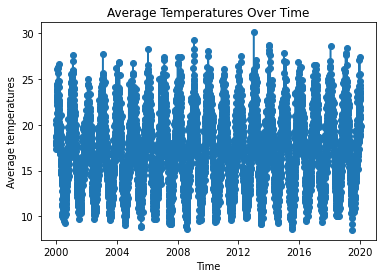

In [30]:
plt.plot(average_day_temperatures.index, average_day_temperatures.values, marker = 'o', linestyle = '-')
plt.title('Average Temperatures Over Time')
plt.xlabel('Time')
plt.ylabel('Average temperatures')
plt.show()

## Averge temp for 24 hour period

In [31]:
average_temp_30min = weather.groupby(weather.index.floor('30min').time)['Air Temperature in degrees C'].mean()
# 30 min time interval average temperature 
#weather.index accesses datatime column, while .floor('30min') rounds down each time stamps to nearest 30 min interval.
# .time extracts time part of datetime column
average_temp_30min

00:00:00    15.289782
00:30:00    15.099372
01:00:00    14.943039
01:30:00    14.786061
02:00:00    14.641568
02:30:00    14.494921
03:00:00    14.347239
03:30:00    14.215517
04:00:00    14.094689
04:30:00    13.977193
05:00:00    13.869575
05:30:00    13.784072
06:00:00    13.774910
06:30:00    13.857403
07:00:00    14.109761
07:30:00    14.580443
08:00:00    15.211116
08:30:00    15.936428
09:00:00    16.673749
09:30:00    17.367367
10:00:00    18.014008
10:30:00    18.607501
11:00:00    19.120359
11:30:00    19.540102
12:00:00    19.923403
12:30:00    20.225998
13:00:00    20.445969
13:30:00    20.589576
14:00:00    20.681647
14:30:00    20.676035
15:00:00    20.608487
15:30:00    20.437660
16:00:00    20.179901
16:30:00    19.877563
17:00:00    19.495628
17:30:00    19.085366
18:00:00    18.661186
18:30:00    18.258994
19:00:00    17.855082
19:30:00    17.480942
20:00:00    17.131060
20:30:00    16.810581
21:00:00    16.535217
21:30:00    16.296743
22:00:00    16.081582
22:30:00  

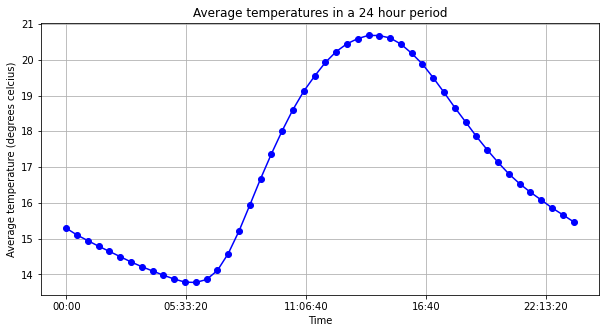

In [32]:
average_temp_30min.plot(kind = 'line', marker = 'o', linestyle = '-', color = 'b', figsize = (10,5))
plt.title('Average temperatures in a 24 hour period')
plt.xlabel('Time')
plt.ylabel('Average temperature (degrees celcius)')
plt.grid(True)
plt.show()

## Average temp for 24 hour period by season

In [33]:
weather_summer['Air Temperature in degrees C'] = pd.to_numeric(weather_summer['Air Temperature in degrees C'], errors = 'coerce')
weather_autumn['Air Temperature in degrees C'] = pd.to_numeric(weather_autumn['Air Temperature in degrees C'], errors = 'coerce')
weather_winter['Air Temperature in degrees C'] = pd.to_numeric(weather_winter['Air Temperature in degrees C'], errors = 'coerce')
weather_spring['Air Temperature in degrees C'] = pd.to_numeric(weather_spring['Air Temperature in degrees C'], errors = 'coerce')

In [34]:
average_temp_summer = weather_summer.groupby(weather_summer.index.floor('30min').time)['Air Temperature in degrees C'].mean()
average_temp_summer

00:00:00    19.596908
00:30:00    19.385621
01:00:00    19.217240
01:30:00    19.041690
02:00:00    18.884844
02:30:00    18.724049
03:00:00    18.575038
03:30:00    18.425899
04:00:00    18.292942
04:30:00    18.160373
05:00:00    18.065998
05:30:00    17.990162
06:00:00    18.049564
06:30:00    18.232810
07:00:00    18.591531
07:30:00    19.139590
08:00:00    19.862238
08:30:00    20.575602
09:00:00    21.239900
09:30:00    21.879698
10:00:00    22.439648
10:30:00    22.980929
11:00:00    23.445556
11:30:00    23.858931
12:00:00    24.238644
12:30:00    24.477800
13:00:00    24.756096
13:30:00    24.878873
14:00:00    24.928701
14:30:00    25.024311
15:00:00    24.982584
15:30:00    24.899948
16:00:00    24.787327
16:30:00    24.599060
17:00:00    24.353358
17:30:00    24.077592
18:00:00    23.678442
18:30:00    23.260873
19:00:00    22.786646
19:30:00    22.321381
20:00:00    21.827471
20:30:00    21.377867
21:00:00    21.041683
21:30:00    20.723859
22:00:00    20.489244
22:30:00  

In [35]:
average_temp_autumn = weather_autumn.groupby(weather_autumn.index.floor('30min').time)['Air Temperature in degrees C'].mean()
average_temp_autumn

00:00:00    15.930966
00:30:00    15.747428
01:00:00    15.577971
01:30:00    15.422635
02:00:00    15.286607
02:30:00    15.135414
03:00:00    14.995513
03:30:00    14.869210
04:00:00    14.733355
04:30:00    14.622562
05:00:00    14.522324
05:30:00    14.414377
06:00:00    14.346906
06:30:00    14.327277
07:00:00    14.446191
07:30:00    14.779141
08:00:00    15.358907
08:30:00    16.162871
09:00:00    16.948695
09:30:00    17.705567
10:00:00    18.424132
10:30:00    19.017574
11:00:00    19.590054
11:30:00    20.056185
12:00:00    20.476275
12:30:00    20.817513
13:00:00    21.006596
13:30:00    21.193557
14:00:00    21.251007
14:30:00    21.245696
15:00:00    21.185629
15:30:00    20.987711
16:00:00    20.667685
16:30:00    20.314527
17:00:00    19.895366
17:30:00    19.420610
18:00:00    18.987684
18:30:00    18.614293
19:00:00    18.230310
19:30:00    17.862573
20:00:00    17.553258
20:30:00    17.286648
21:00:00    17.030751
21:30:00    16.810429
22:00:00    16.598215
22:30:00  

In [36]:
average_temp_winter = weather_winter.groupby(weather_winter.index.floor('30min').time)['Air Temperature in degrees C'].mean()
average_temp_winter

00:00:00    10.791606
00:30:00    10.640153
01:00:00    10.499538
01:30:00    10.372366
02:00:00    10.252126
02:30:00    10.128493
03:00:00    10.001909
03:30:00     9.874397
04:00:00     9.767205
04:30:00     9.675501
05:00:00     9.576477
05:30:00     9.470190
06:00:00     9.409620
06:30:00     9.354323
07:00:00     9.408534
07:30:00     9.677407
08:00:00    10.111237
08:30:00    10.741791
09:00:00    11.493868
09:30:00    12.244403
10:00:00    12.968256
10:30:00    13.619177
11:00:00    14.186026
11:30:00    14.691135
12:00:00    15.123408
12:30:00    15.522327
13:00:00    15.779507
13:30:00    15.932265
14:00:00    16.024150
14:30:00    15.974938
15:00:00    15.900732
15:30:00    15.655294
16:00:00    15.288085
16:30:00    14.884720
17:00:00    14.362688
17:30:00    13.864201
18:00:00    13.454229
18:30:00    13.105351
19:00:00    12.801212
19:30:00    12.535202
20:00:00    12.300063
20:30:00    12.077470
21:00:00    11.858131
21:30:00    11.666719
22:00:00    11.484000
22:30:00  

In [37]:
average_temp_spring = weather_spring.groupby(weather_spring.index.floor('30min').time)['Air Temperature in degrees C'].mean()
average_temp_spring

00:00:00    14.940553
00:30:00    14.738328
01:00:00    14.566229
01:30:00    14.393862
02:00:00    14.237605
02:30:00    14.075469
03:00:00    13.922992
03:30:00    13.791407
04:00:00    13.672443
04:30:00    13.536754
05:00:00    13.405081
05:30:00    13.354966
06:00:00    13.399068
06:30:00    13.620807
07:00:00    14.107404
07:30:00    14.814488
08:00:00    15.603408
08:30:00    16.371615
09:00:00    17.109455
09:30:00    17.737075
10:00:00    18.324021
10:30:00    18.870819
11:00:00    19.339612
11:30:00    19.665184
12:00:00    19.950475
12:30:00    20.173047
13:00:00    20.328765
13:30:00    20.431822
14:00:00    20.529330
14:30:00    20.506420
15:00:00    20.390312
15:30:00    20.238483
16:00:00    19.996371
16:30:00    19.715268
17:00:00    19.366909
17:30:00    18.986736
18:00:00    18.541213
18:30:00    18.105553
19:00:00    17.677948
19:30:00    17.305669
20:00:00    16.931739
20:30:00    16.613430
21:00:00    16.326124
21:30:00    16.092436
22:00:00    15.861790
22:30:00  

In [38]:
combined_seasonal_average = pd.merge(average_temp_summer, average_temp_autumn, left_index = True, right_index = True, how = 'outer')
combined_seasonal_average = combined_seasonal_average.rename(columns = {'Air Temperature in degrees C_x': 'Summer temps', 'Air Temperature in degrees C_y':'Autumn temps'})
combined_seasonal_average = pd.merge(combined_seasonal_average, average_temp_winter, left_index = True, right_index = True, how = 'outer')
combined_seasonal_average = combined_seasonal_average.rename(columns = {'Air Temperature in degrees C': 'Winter temps'})
combined_seasonal_average = pd.merge(combined_seasonal_average, average_temp_spring, left_index = True, right_index = True, how = 'outer')
combined_seasonal_average = combined_seasonal_average.rename(columns = {'Air Temperature in degrees C': 'Spring temps'})
combined_seasonal_average

,Summer temps,Autumn temps,Winter temps,Spring temps
00:00:00,19.596908,15.930966,10.791606,14.940553
00:30:00,19.385621,15.747428,10.640153,14.738328
01:00:00,19.217240,15.577971,10.499538,14.566229
01:30:00,19.041690,15.422635,10.372366,14.393862
02:00:00,18.884844,15.286607,10.252126,14.237605
02:30:00,18.724049,15.135414,10.128493,14.075469
03:00:00,18.575038,14.995513,10.001909,13.922992
03:30:00,18.425899,14.869210,9.874397,13.791407
04:00:00,18.292942,14.733355,9.767205,13.672443
04:30:00,18.160373,14.622562,9.675501,13.536754


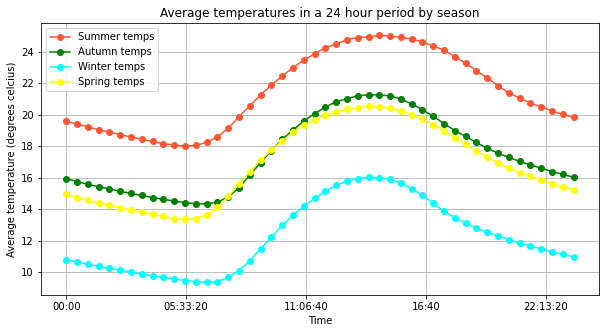

In [39]:
combined_seasonal_average.plot(kind = 'line', marker = 'o', linestyle = '-', color = ['#FF5733', (0, 0.5, 0),'cyan', 'yellow'], figsize = (10,5))
plt.title('Average temperatures in a 24 hour period by season')
plt.xlabel('Time')
plt.ylabel('Average temperature (degrees celcius)')
plt.grid(True)
plt.show()

### Average temperature by state

In [40]:
weather

,Location,Precipitation since 9am local time in mm,Air Temperature in degrees C,Wet bulb temperature in degrees C,Dew point temperature in degrees C,Relative humidity in percentage %,Wind speed in km/h,Wind direction in degrees true,Speed of maximum windgust in last 10 minutes in km/h,Mean sea level pressure in hPa,Station level pressure in hPa,AWS Flag,#,Datetime
Datetime,,,,,,,,,,,,,,
2000-01-01 01:00:00,Adelaide,0.0,13.1,10.0,6.6,65,14.8,190,24.1,1018.9,1012.8,,#,2000-01-01 01:00:00
2000-01-01 01:30:00,Adelaide,0.0,13.2,10.1,6.8,65,9.4,200,16.6,1018.7,1012.6,,#,2000-01-01 01:30:00
2000-01-01 02:00:00,Adelaide,0.0,13.4,10.1,6.5,63,13.0,180,20.5,1018.5,1012.4,,#,2000-01-01 02:00:00
2000-01-01 02:30:00,Adelaide,0.0,13.2,10.0,6.5,64,9.4,170,18.4,1018.3,1012.2,,#,2000-01-01 02:30:00
2000-01-01 03:00:00,Adelaide,0.0,13.0,9.7,6.0,62,11.2,150,20.5,1018.3,1012.2,,#,2000-01-01 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-20 08:00:00,Hobart,0.0,14.9,12.5,10.3,74,14.8,130,20.5,1011.4,1005.3,1,#,2020-01-20 08:00:00
2020-01-20 08:30:00,Hobart,0.0,14.9,12.4,10.1,73,13.0,140,18.4,1011.5,1005.4,1,#,2020-01-20 08:30:00
2020-01-20 09:00:00,Hobart,0.0,14.9,12.4,10.1,73,16.6,150,24.1,1011.7,1005.6,1,#,2020-01-20 09:00:00


In [41]:
weather['Location'].unique()

array(['Adelaide', 'Brisbane', 'Sydney', 'Melbourne Regional',
       'Melbourne Olympic Park', 'Hobart'], dtype=object)

In [42]:
weather_adelaide = weather.loc[weather['Location'] == 'Adelaide'].copy() # creating data frame for each state
weather_brisbane = weather.loc[weather['Location'] == 'Brisbane'].copy()
weather_sydney = weather.loc[weather['Location'] == 'Sydney'].copy()
weather_melb_reg = weather.loc[weather['Location'] == 'Melbourne Regional'].copy()
weather_melb_cbd = weather.loc[weather['Location'] == 'Melbourne Olympic Park'].copy()
weather_hobart = weather.loc[weather['Location'] == 'Hobart'].copy()

In [43]:
average_temp_adelaide = weather_adelaide.groupby(weather_adelaide.index.floor('30min').time)['Air Temperature in degrees C'].mean()
average_temp_brisbane = weather_brisbane.groupby(weather_brisbane.index.floor('30min').time)['Air Temperature in degrees C'].mean()
average_temp_sydney = weather_sydney.groupby(weather_sydney.index.floor('30min').time)['Air Temperature in degrees C'].mean()
average_temp_melb_reg = weather_melb_reg.groupby(weather_melb_reg.index.floor('30min').time)['Air Temperature in degrees C'].mean()
average_temp_melb_cbd = weather_melb_cbd.groupby(weather_melb_cbd.index.floor('30min').time)['Air Temperature in degrees C'].mean()
average_temp_hobart = weather_hobart.groupby(weather_hobart.index.floor('30min').time)['Air Temperature in degrees C'].mean()
# 30 min average for every state

In [44]:
combined_state_average = pd.merge(average_temp_adelaide, average_temp_brisbane, left_index = True, right_index = True, how = 'outer')
combined_state_average = combined_state_average.rename(columns = {'Air Temperature in degrees C_x':'Adelaide temperature', 'Air Temperature in degrees C_y':'Brisbane temperature'})
combined_state_average = pd.merge(combined_state_average, average_temp_sydney, left_index = True, right_index = True, how = 'outer')
combined_state_average = combined_state_average.rename(columns = {'Air Temperature in degrees C':'Sydney temperature'})
combined_state_average = pd.merge(combined_state_average, average_temp_melb_reg, left_index = True, right_index = True, how = 'outer')
combined_state_average = combined_state_average.rename(columns = {'Air Temperature in degrees C':'Melbourne regional temperature'})
combined_state_average = pd.merge(combined_state_average, average_temp_melb_cbd, left_index = True, right_index = True, how = 'outer')
combined_state_average = combined_state_average.rename(columns = {'Air Temperature in degrees C':'Melbourne CBD temperature'})
combined_state_average = pd.merge(combined_state_average, average_temp_hobart, left_index = True, right_index = True, how = 'outer')
combined_state_average = combined_state_average.rename(columns = {'Air Temperature in degrees C':'Hobart'})
combined_state_average
# merging all average by states into 1 data frame for graphing

,Adelaide temperature,Brisbane temperature,Sydney temperature,Melbourne regional temperature,Melbourne CBD temperature,Hobart
00:00:00,15.220434,18.500575,17.097527,14.591630,14.279097,11.459672
00:30:00,15.054184,18.318984,16.902557,14.357882,14.047600,11.295997
01:00:00,14.907240,18.171579,16.715174,14.145965,13.874333,11.185016
01:30:00,14.753747,18.006685,16.549029,13.952333,13.709315,11.085716
02:00:00,14.609705,17.849473,16.384554,13.777761,13.552903,10.974659
02:30:00,14.467482,17.684355,16.230289,13.619410,13.407241,10.858131
03:00:00,14.309772,17.541410,16.076595,13.449478,13.266935,10.730515
03:30:00,14.183779,17.379284,15.935532,13.302049,13.171602,10.647654
04:00:00,14.060482,17.236753,15.802889,13.167478,13.088477,10.562870
04:30:00,13.929736,17.091600,15.676605,13.060472,12.970012,10.482902


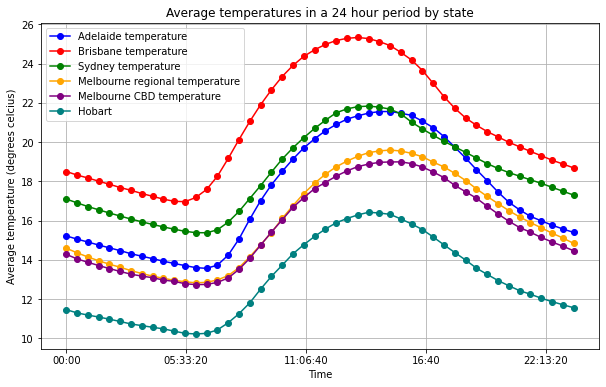

In [45]:
combined_state_average.plot(kind = 'line', marker = 'o', linestyle = '-', color = ['blue', 'red', 'green', 'orange', 'purple', 'teal'], figsize = (10,6))
plt.title('Average temperatures in a 24 hour period by state')
plt.xlabel('Time')
plt.ylabel('Average temperature (degrees celcius)')
plt.grid(True)
plt.show()

### Riley
there are two melbourne stations, Olypic Park has data from 2013-2020, Regional has data from 2000-2015. To create a single set of melbourne weather data we combine these two stations, and take the average between them when the data overlaps.

In [46]:
Melb_regional_weather = weather[weather["Location"] == "Melbourne Regional"]
Melb_olympic_park_weather = weather[weather["Location"] == "Melbourne Olympic Park"]

In [47]:
import datetime

d = datetime.date(2013, 10, 1)

Melb_weather = pd.concat([Melb_regional_weather, Melb_olympic_park_weather])
print(Melb_weather.columns[-1])
Melb_weather = Melb_weather.iloc[:,:-1]
Melb_weather[Melb_weather.index == pd.to_datetime(d)]

Datetime


,Location,Precipitation since 9am local time in mm,Air Temperature in degrees C,Wet bulb temperature in degrees C,Dew point temperature in degrees C,Relative humidity in percentage %,Wind speed in km/h,Wind direction in degrees true,Speed of maximum windgust in last 10 minutes in km/h,Mean sea level pressure in hPa,Station level pressure in hPa,AWS Flag,#
Datetime,,,,,,,,,,,,,
2013-10-01,Melbourne Regional,0.0,20.6,15.5,11.4,56,,,,998.2,994.5,1,#
2013-10-01,Melbourne Olympic Park,0.2,21.1,16.1,12.3,57,27.7,340,50.0,999.0,998.1,1,#


In [48]:
Melb_weather = Melb_weather.groupby(level=0).mean()
Melb_weather["Location"] = "Melbourne"

In [49]:
Melb_weather

,Air Temperature in degrees C,Location
Datetime,,
2000-01-01 01:30:00,13.7,Melbourne
2000-01-01 02:00:00,13.6,Melbourne
2000-01-01 02:30:00,13.3,Melbourne
2000-01-01 03:00:00,14.1,Melbourne
2000-01-01 03:30:00,13.5,Melbourne
...,...,...
2020-01-20 08:00:00,19.7,Melbourne
2020-01-20 08:30:00,20.2,Melbourne
2020-01-20 09:00:00,21.2,Melbourne


# Merging data frames
Angus

Changed some earlier code to make this work far easier. Removed the lines that set the index to datatime for both energy and weather data frames so they can be merged on both datetime and location easily (gets confused when datetime is both a column and the index).

This mucks up Aden's code so perhaps a solution is to reset the index to numbers, merge it on the datetime column, then reset the index

In [50]:
weather.sample(5)

,Location,Precipitation since 9am local time in mm,Air Temperature in degrees C,Wet bulb temperature in degrees C,Dew point temperature in degrees C,Relative humidity in percentage %,Wind speed in km/h,Wind direction in degrees true,Speed of maximum windgust in last 10 minutes in km/h,Mean sea level pressure in hPa,Station level pressure in hPa,AWS Flag,#,Datetime
Datetime,,,,,,,,,,,,,,
2012-07-21 21:30:00,Adelaide,0.0,9.8,9.1,8.3,90,0.0,0,9.4,1034.2,1027.9,1,#,2012-07-21 21:30:00
2001-07-09 10:30:00,Hobart,,10.2,8.8,7.3,82,5.4,30,9.4,1025.8,1019.5,1,#,2001-07-09 10:30:00
2012-09-24 03:00:00,Adelaide,0.6,8.3,7.5,6.6,89,5.4,160,7.6,1019.6,1013.4,1,#,2012-09-24 03:00:00
2008-03-28 01:00:00,Sydney,0.0,17.8,14.9,12.6,72,,,,1016.1,1011.4,1,#,2008-03-28 01:00:00
2018-05-09 09:30:00,Hobart,0.0,15.1,10.4,5.3,52,25.9,320,40.7,1008.4,1002.2,1,#,2018-05-09 09:30:00


In [51]:
weather.drop(columns = ['Wind direction in degrees true','Speed of maximum windgust in last 10 minutes in  km/h', 'Mean sea level pressure in hPa',
            'Station level pressure in hPa', 'AWS Flag', '#', 'Wind speed in km/h'], inplace = True)
# getting rid of unnecessary columns

In [52]:
annoying_columns = weather.columns[1:6]
for column in annoying_columns:
    weather.iloc[weather[column] == '     '] = np.nan # 5 spaces
    weather.iloc[weather[column] == "      "] = np.nan # 6 spaces
weather.iloc[weather['Relative humidity in percentage %'] == '###'] = np.nan
print('Shape', weather.shape, 'before dropping nans in the temperature column.')
weather.dropna(inplace = True)
print('Shape', weather.shape, 'after dropping nans in the temperature column.')
print("Only about 70 000 rows were dropped, which is a very small portion of the data.")
weather.isna().sum()

Shape (1826244, 7) before dropping nans in the temperature column.
Shape (1759531, 7) after dropping nans in the temperature column.
Only about 70 000 rows were dropped, which is a very small portion of the data.


Location                                    0
Precipitation since 9am local time in mm    0
Air Temperature in degrees C                0
Wet bulb temperature in degrees C           0
Dew point temperature in degrees C          0
Relative humidity in percentage %           0
Datetime                                    0
dtype: int64

In [53]:
numeric_columns = weather.columns[1:6]
for column in numeric_columns:
    weather[column] = pd.to_numeric(weather[column])
weather.dtypes

Location                                            object
Precipitation since 9am local time in mm           float64
Air Temperature in degrees C                       float64
Wet bulb temperature in degrees C                  float64
Dew point temperature in degrees C                 float64
Relative humidity in percentage %                    int64
Datetime                                    datetime64[ns]
dtype: object

In [54]:
weather.drop(columns = 'Datetime', inplace = True)
weather.reset_index(inplace = True)
print(weather.Location.unique())
weather.sample(5)

['Adelaide' 'Brisbane' 'Sydney' 'Melbourne Regional'
 'Melbourne Olympic Park' 'Hobart']


,Datetime,Location,Precipitation since 9am local time in mm,Air Temperature in degrees C,Wet bulb temperature in degrees C,Dew point temperature in degrees C,Relative humidity in percentage %
1133022,2004-11-02 15:00:00,Melbourne Regional,6.8,11.4,10.7,10.1,92
360945,2000-06-27 07:00:00,Brisbane,0.0,12.7,11.9,11.1,90
362969,2000-08-08 09:00:00,Brisbane,1.4,16.2,14.2,12.6,79
1331963,2014-08-16 11:00:00,Melbourne Olympic Park,0.0,10.5,9.6,8.6,88
39887,2002-04-09 11:30:00,Adelaide,0.0,27.1,17.1,8.9,32


In [55]:
energy['State'].replace(to_replace = 'NSW1', value = 'Sydney', inplace = True)
energy['State'].replace(to_replace = 'QLD1', value = 'Brisbane', inplace = True)
energy['State'].replace(to_replace = 'VIC1', value = 'Melbourne', inplace = True)
energy['State'].replace(to_replace = 'TAS1', value = 'Hobart', inplace = True)
energy['State'].replace(to_replace = 'SA1', value = 'Adelaide', inplace = True)
energy.columns = ['Location', 'Datetime', 'Total_demand', 'RRP']

In [56]:
energy['Datetime'] = pd.to_datetime(energy['Datetime'])
energy.dtypes

Location                object
Datetime        datetime64[ns]
Total_demand           float64
RRP                    float64
dtype: object

In [57]:
energy.drop(columns = 'Datetime', inplace = True)
energy.reset_index(inplace = True)
energy = energy.rename(columns={'Date_Time' : 'Datetime'})
energy.sample(5)

,Datetime,Location,Total_demand,RRP
62673,2016-01-09 17:30:00,Melbourne,6283.28000,47.29
1205230,2007-06-17 21:30:00,Sydney,10004.83000,58.86
944221,2003-02-27 03:30:00,Melbourne,4571.46167,4.32
182998,2006-07-06 13:00:00,Sydney,9942.61000,22.26
1287341,2014-11-21 17:30:00,Sydney,10812.10000,149.15


In [58]:
energy = energy.rename(columns={'Date_Time' : 'Datetime'})

In [59]:
combined = pd.merge(energy, weather, how = 'inner', on = ['Datetime', 'Location'])
combined.columns=['Datetime', 'Location', 'Energy_Demand', 'RRP', 'Rain_since_9am_in_mm', 'Temperature', 
            'Wet_bulb_temp', 'Dew_point', 'Relative humidity%']
print("The shape of the data frame is", combined.shape)
combined.head()

The shape of the data frame is (1291902, 9)


,Datetime,Location,Energy_Demand,RRP,Rain_since_9am_in_mm,Temperature,Wet_bulb_temp,Dew_point,Relative humidity%
0,2000-09-01 00:30:00,Sydney,8117.23667,36.72,0.0,14.9,9.6,3.3,46
1,2000-09-01 01:00:00,Sydney,7799.70000,32.92,0.0,14.6,9.6,3.7,48
2,2000-09-01 01:30:00,Sydney,7453.99000,27.84,0.0,13.7,9.5,4.7,54
3,2000-09-01 02:00:00,Sydney,7095.55333,30.62,0.0,13.6,9.3,4.2,53
4,2000-09-01 02:30:00,Sydney,6786.22167,33.53,0.0,13.4,9.3,4.5,55


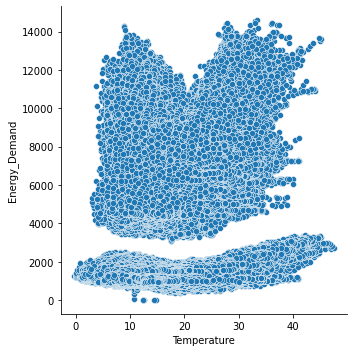

In [60]:
sns.relplot(x='Temperature', y='Energy_Demand', data = combined);

In [61]:
S = combined[combined['Location'] == 'Sydney']
A = combined[combined['Location'] == 'Adelaide']
H = combined[combined['Location'] == 'Hobart']
B = combined[combined['Location'] == 'Brisbane']

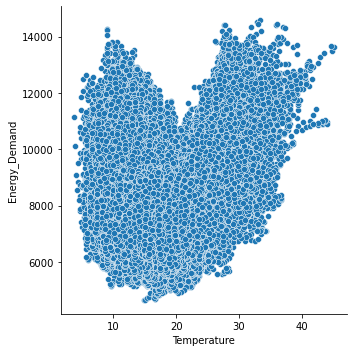

In [62]:
sns.relplot(x='Temperature', y='Energy_Demand', data = S);

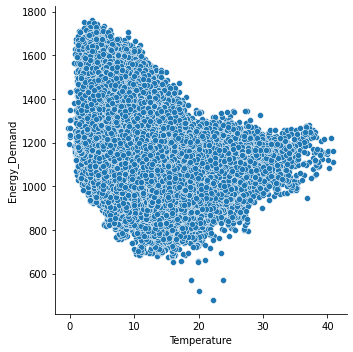

In [63]:
sns.relplot(x='Temperature', y='Energy_Demand', data = H);

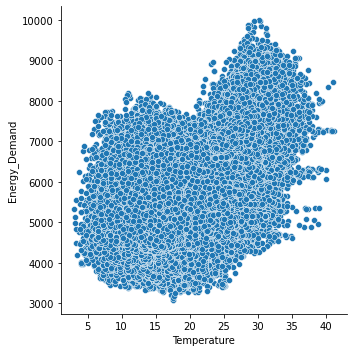

In [64]:
sns.relplot(x='Temperature', y='Energy_Demand', data = B);

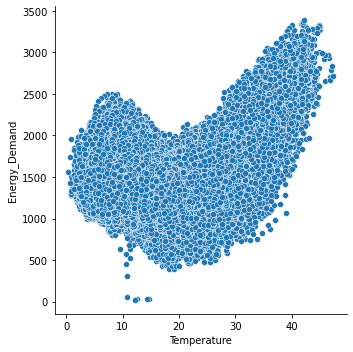

In [65]:
sns.relplot(x='Temperature', y='Energy_Demand', data = A);

# Anomolies 

In [66]:
anomaly = S['Energy_Demand'] - S.Energy_Demand.mean() # stores the values of a new column
S = pd.concat([S, anomaly], axis = 1) # adds it to the dataframe
anomaly = H['Energy_Demand'] - H.Energy_Demand.mean()
H = pd.concat([H, anomaly], axis = 1)
anomaly = A['Energy_Demand'] - A.Energy_Demand.mean()
A = pd.concat([A, anomaly], axis = 1)
anomaly = B['Energy_Demand'] - B.Energy_Demand.mean()
B = pd.concat([B, anomaly], axis = 1)
for df in [S,H,A,B]:
    df.columns = ['Datetime', 'Location', 'Energy_Demand', 'RRP', 'Rain_since_9am_in_mm', 'Temperature',
             'Wet_bulb_temp', 'Dew_point', 'Relative humidity%', 'Energy_Anomaly']
df = pd.concat([S,H,A,B]) # create the final dataframe


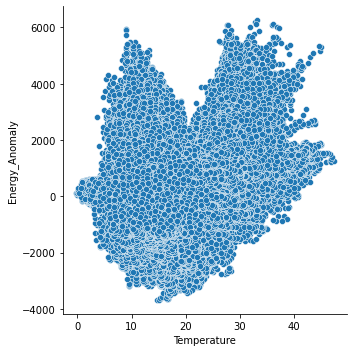

In [67]:
sns.relplot(data = df, x = 'Temperature', y = 'Energy_Anomaly');

# Modelling
As expected, the correlations are quite small as none of the relationships are linear

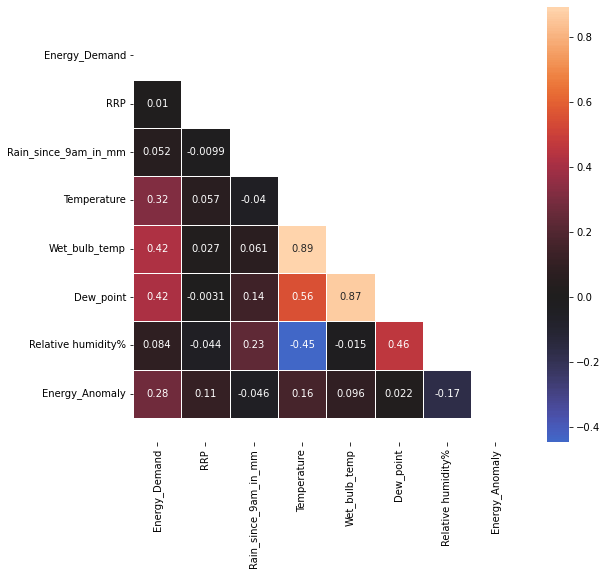

In [68]:
corrs = df.corr()
mask = np.triu(np.ones_like(corrs, dtype=bool)) 
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5)
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5);

## Aden graphing energy vs temp

In [69]:
combined

,Datetime,Location,Energy_Demand,RRP,Rain_since_9am_in_mm,Temperature,Wet_bulb_temp,Dew_point,Relative humidity%
0,2000-09-01 00:30:00,Sydney,8117.23667,36.72,0.0,14.9,9.6,3.3,46
1,2000-09-01 01:00:00,Sydney,7799.70000,32.92,0.0,14.6,9.6,3.7,48
2,2000-09-01 01:30:00,Sydney,7453.99000,27.84,0.0,13.7,9.5,4.7,54
3,2000-09-01 02:00:00,Sydney,7095.55333,30.62,0.0,13.6,9.3,4.2,53
4,2000-09-01 02:30:00,Sydney,6786.22167,33.53,0.0,13.4,9.3,4.5,55
...,...,...,...,...,...,...,...,...,...
1291897,2008-04-30 22:00:00,Brisbane,6017.13000,37.17,0.0,12.6,10.4,8.1,74
1291898,2008-04-30 22:30:00,Brisbane,5847.77000,54.53,0.0,12.2,10.0,7.7,74
1291899,2008-04-30 23:00:00,Brisbane,5665.46000,38.39,0.0,11.9,9.7,7.2,73
1291900,2008-04-30 23:30:00,Brisbane,5570.00000,36.48,0.0,11.7,9.5,7.1,73


In [70]:
combined.set_index(combined['Datetime'], inplace = True)

temp_30min_average = combined.groupby(combined.index.floor('30min').time)['Temperature'].mean()
energy_30min_average = combined.groupby(combined.index.floor('30min').time)['Energy_Demand'].mean()

energy_vs_temp = pd.merge(temp_30min_average, energy_30min_average, left_index = True, right_index = True, how = 'outer')
energy_vs_temp

,Temperature,Energy_Demand
00:00:00,15.827828,4181.820952
00:30:00,15.658228,4055.762144
01:00:00,15.503488,3944.401277
01:30:00,15.352002,3811.597443
02:00:00,15.213339,3690.127579
02:30:00,15.067240,3579.166976
03:00:00,14.923787,3503.574520
03:30:00,14.789626,3454.830905
04:00:00,14.662722,3434.006171
04:30:00,14.537761,3456.939592


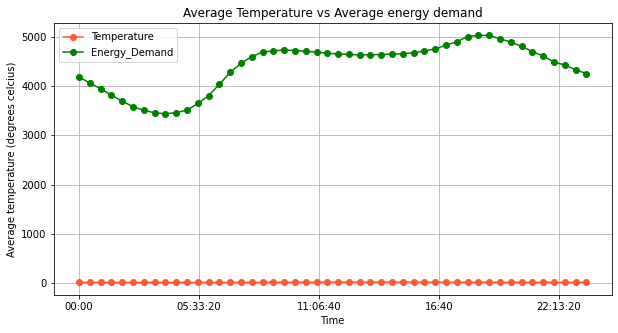

In [71]:
energy_vs_temp.plot(kind = 'line', marker = 'o', linestyle = '-', color = ['#FF5733', (0, 0.5, 0)], figsize = (10,5))
plt.title('Average Temperature vs Average energy demand')
plt.xlabel('Time')
plt.ylabel('Average temperature (degrees celcius)')
plt.grid(True)
plt.show()

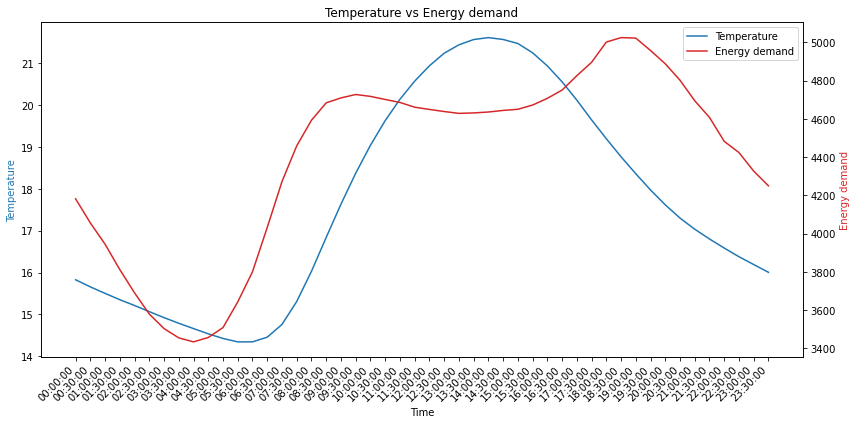

In [72]:
fig, ax1 = plt.subplots(figsize=(12, 6))

x = np.arange(len(energy_vs_temp))

ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature', color='tab:blue')
ax1.plot(x, energy_vs_temp['Temperature'], color='tab:blue', label='Temperature')

ax2 = ax1.twinx()

ax2.set_ylabel('Energy demand', color='tab:red')
ax2.plot(x, energy_vs_temp['Energy_Demand'], color='tab:red', label='Energy demand')

ax1.set_xticks(x)
ax1.set_xticklabels([str(time) for time in energy_vs_temp.index], rotation=45, ha='right')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper right')

plt.title('Temperature vs Energy demand')
plt.tight_layout()
plt.show()


In [73]:
S.set_index(S['Datetime'], inplace = True)

S_temp_30min_average = S.groupby(S.index.floor('30min').time)['Temperature'].mean()
S_energy_30min_average = S.groupby(S.index.floor('30min').time)['Energy_Demand'].mean()

S_energy_vs_temp = pd.merge(S_temp_30min_average, S_energy_30min_average, left_index = True, right_index = True, how = 'outer')

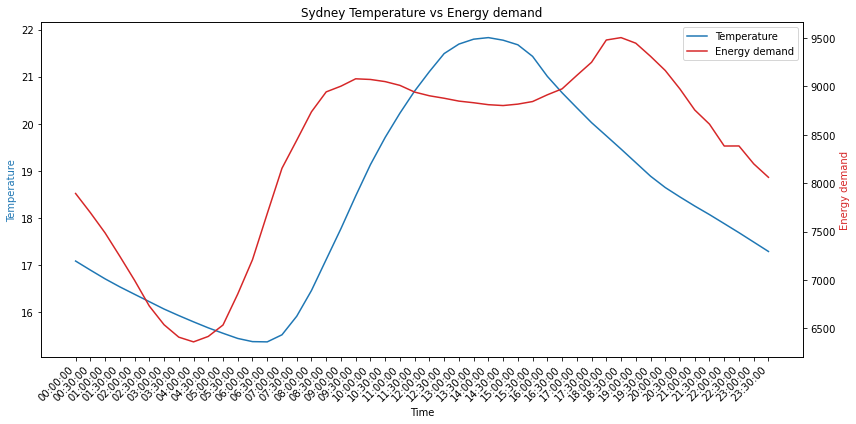

In [74]:
fig, ax1 = plt.subplots(figsize=(12, 6))

x = np.arange(len(S_energy_vs_temp))

ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature', color='tab:blue')
ax1.plot(x, S_energy_vs_temp['Temperature'], color='tab:blue', label='Temperature')

ax2 = ax1.twinx()

ax2.set_ylabel('Energy demand', color='tab:red')
ax2.plot(x, S_energy_vs_temp['Energy_Demand'], color='tab:red', label='Energy demand')

ax1.set_xticks(x)
ax1.set_xticklabels([str(time) for time in S_energy_vs_temp.index], rotation=45, ha='right')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper right')

plt.title('Sydney Temperature vs Energy demand')
plt.tight_layout()
plt.show()


In [75]:
A.set_index(A['Datetime'], inplace = True)

A_temp_30min_average = A.groupby(A.index.floor('30min').time)['Temperature'].mean()
A_energy_30min_average = A.groupby(A.index.floor('30min').time)['Energy_Demand'].mean()

A_energy_vs_temp = pd.merge(A_temp_30min_average, A_energy_30min_average, left_index = True, right_index = True, how = 'outer')

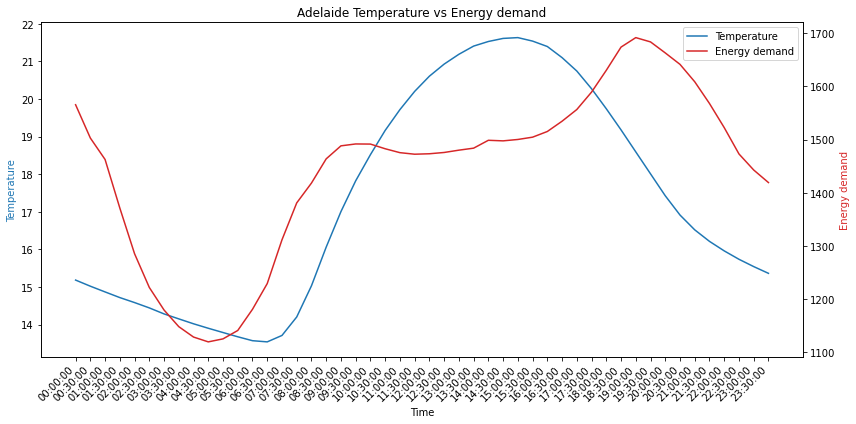

In [76]:
fig, ax1 = plt.subplots(figsize=(12, 6))

x = np.arange(len(A_energy_vs_temp))

ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature', color='tab:blue')
ax1.plot(x, A_energy_vs_temp['Temperature'], color='tab:blue', label='Temperature')

ax2 = ax1.twinx()

ax2.set_ylabel('Energy demand', color='tab:red')
ax2.plot(x, A_energy_vs_temp['Energy_Demand'], color='tab:red', label='Energy demand')

ax1.set_xticks(x)
ax1.set_xticklabels([str(time) for time in A_energy_vs_temp.index], rotation=45, ha='right')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper right')

plt.title('Adelaide Temperature vs Energy demand')
plt.tight_layout()
plt.show()


In [77]:
H.set_index(H['Datetime'], inplace = True)

H_temp_30min_average = H.groupby(H.index.floor('30min').time)['Temperature'].mean()
H_energy_30min_average = H.groupby(H.index.floor('30min').time)['Energy_Demand'].mean()

H_energy_vs_temp = pd.merge(H_temp_30min_average, H_energy_30min_average, left_index = True, right_index = True, how = 'outer')

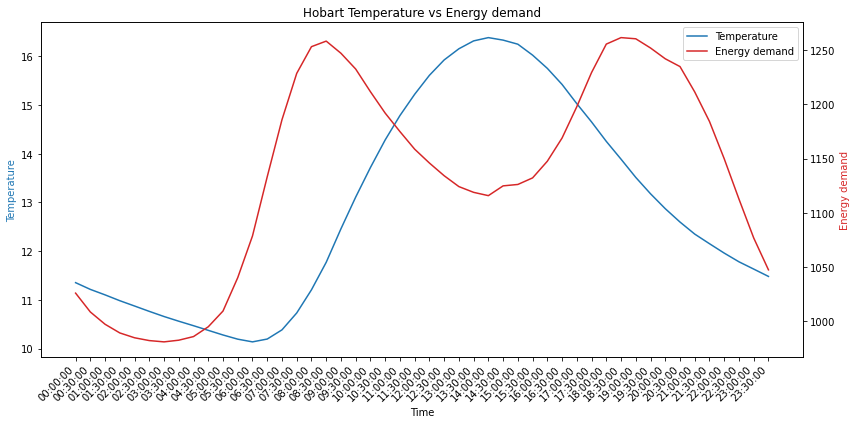

In [78]:
fig, ax1 = plt.subplots(figsize=(12, 6))

x = np.arange(len(H_energy_vs_temp))

ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature', color='tab:blue')
ax1.plot(x, H_energy_vs_temp['Temperature'], color='tab:blue', label='Temperature')

ax2 = ax1.twinx()

ax2.set_ylabel('Energy demand', color='tab:red')
ax2.plot(x, H_energy_vs_temp['Energy_Demand'], color='tab:red', label='Energy demand')

ax1.set_xticks(x)
ax1.set_xticklabels([str(time) for time in H_energy_vs_temp.index], rotation=45, ha='right')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper right')

plt.title('Hobart Temperature vs Energy demand')
plt.tight_layout()
plt.show()


In [79]:
B.set_index(B['Datetime'], inplace = True)

B_temp_30min_average = B.groupby(B.index.floor('30min').time)['Temperature'].mean()
B_energy_30min_average = B.groupby(B.index.floor('30min').time)['Energy_Demand'].mean()

B_energy_vs_temp = pd.merge(B_temp_30min_average, B_energy_30min_average, left_index = True, right_index = True, how = 'outer')

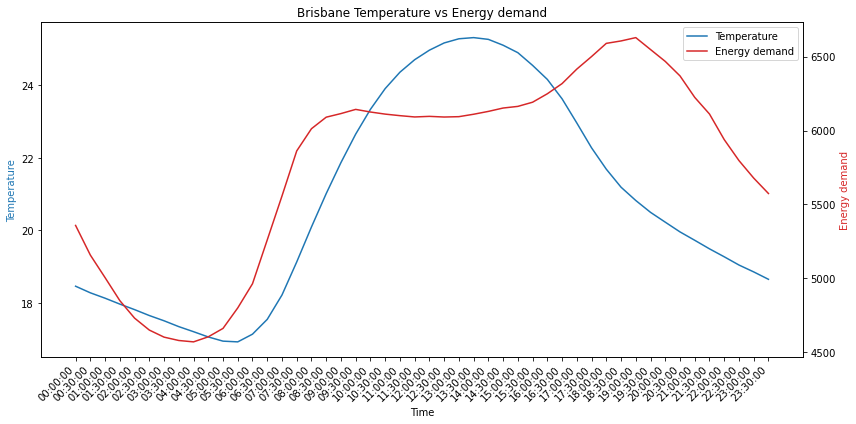

In [80]:
fig, ax1 = plt.subplots(figsize=(12, 6))

x = np.arange(len(B_energy_vs_temp))

ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature', color='tab:blue')
ax1.plot(x, B_energy_vs_temp['Temperature'], color='tab:blue', label='Temperature')

ax2 = ax1.twinx()

ax2.set_ylabel('Energy demand', color='tab:red')
ax2.plot(x, B_energy_vs_temp['Energy_Demand'], color='tab:red', label='Energy demand')

ax1.set_xticks(x)
ax1.set_xticklabels([str(time) for time in B_energy_vs_temp.index], rotation=45, ha='right')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper right')

plt.title('Brisbane Temperature vs Energy demand')
plt.tight_layout()
plt.show()


# Aden Graphing anomalies neatly 

In [81]:
df

,Datetime,Location,Energy_Demand,RRP,Rain_since_9am_in_mm,Temperature,Wet_bulb_temp,Dew_point,Relative humidity%,Energy_Anomaly
0,2000-09-01 00:30:00,Sydney,8117.23667,36.72,0.0,14.9,9.6,3.3,46,-211.036718
1,2000-09-01 01:00:00,Sydney,7799.70000,32.92,0.0,14.6,9.6,3.7,48,-528.573388
2,2000-09-01 01:30:00,Sydney,7453.99000,27.84,0.0,13.7,9.5,4.7,54,-874.283388
3,2000-09-01 02:00:00,Sydney,7095.55333,30.62,0.0,13.6,9.3,4.2,53,-1232.720058
4,2000-09-01 02:30:00,Sydney,6786.22167,33.53,0.0,13.4,9.3,4.5,55,-1542.051718
...,...,...,...,...,...,...,...,...,...,...
1291897,2008-04-30 22:00:00,Brisbane,6017.13000,37.17,0.0,12.6,10.4,8.1,74,245.165188
1291898,2008-04-30 22:30:00,Brisbane,5847.77000,54.53,0.0,12.2,10.0,7.7,74,75.805188
1291899,2008-04-30 23:00:00,Brisbane,5665.46000,38.39,0.0,11.9,9.7,7.2,73,-106.504812
1291900,2008-04-30 23:30:00,Brisbane,5570.00000,36.48,0.0,11.7,9.5,7.1,73,-201.964812


In [82]:
df.set_index(combined['Datetime'], inplace = True)

anomalies_30min_average = df.groupby(df.index.floor('30min').time)['Energy_Anomaly'].mean()
temp_30min_average = combined.groupby(combined.index.floor('30min').time)['Temperature'].mean()

anomalies_vs_temp = pd.merge(anomalies_30min_average, temp_30min_average, left_index = True, right_index = True, how = 'outer')

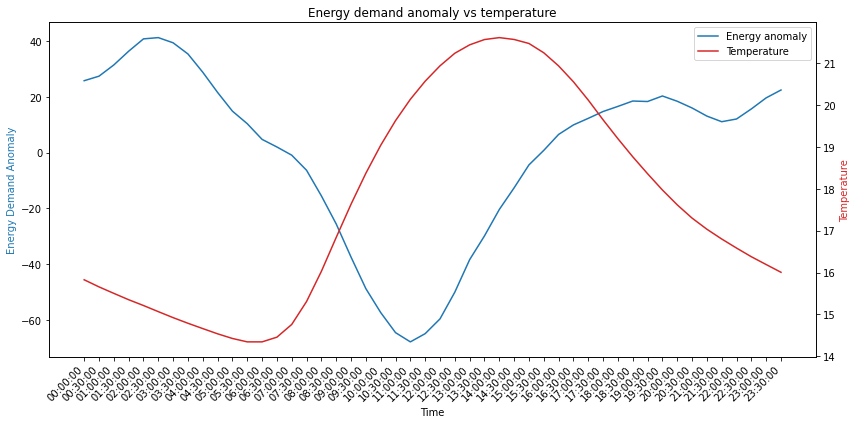

In [83]:
fig, ax1 = plt.subplots(figsize=(12, 6))

x = np.arange(len(anomalies_vs_temp))

ax1.set_xlabel('Time')
ax1.set_ylabel('Energy Demand Anomaly', color='tab:blue')
ax1.plot(x, anomalies_vs_temp['Energy_Anomaly'], color='tab:blue', label='Energy anomaly')


ax2 = ax1.twinx()

ax2.set_ylabel('Temperature', color='tab:red')
ax2.plot(x, anomalies_vs_temp['Temperature'], color='tab:red', label='Temperature')


ax1.set_xticks(x)
ax1.set_xticklabels([str(time) for time in anomalies_vs_temp.index], rotation=45, ha='right')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper right')


plt.title('Energy demand anomaly vs temperature')
plt.tight_layout()
plt.show()

Energy demand anomaly and temperature graphs are reflections of each other. Shows that when there is lower 
temperatures, more energy is used for heating. When temperatures get higher, energy demand starts to increase as well.

# Modelling ADEN

In [84]:
combined_b = pd.concat([S, A, B], axis = 0)
combined_b

,Datetime,Location,Energy_Demand,RRP,Rain_since_9am_in_mm,Temperature,Wet_bulb_temp,Dew_point,Relative humidity%,Energy_Anomaly
Datetime,,,,,,,,,,
2000-09-01 00:30:00,2000-09-01 00:30:00,Sydney,8117.23667,36.72,0.0,14.9,9.6,3.3,46,-211.036718
2000-09-01 01:00:00,2000-09-01 01:00:00,Sydney,7799.70000,32.92,0.0,14.6,9.6,3.7,48,-528.573388
2000-09-01 01:30:00,2000-09-01 01:30:00,Sydney,7453.99000,27.84,0.0,13.7,9.5,4.7,54,-874.283388
2000-09-01 02:00:00,2000-09-01 02:00:00,Sydney,7095.55333,30.62,0.0,13.6,9.3,4.2,53,-1232.720058
2000-09-01 02:30:00,2000-09-01 02:30:00,Sydney,6786.22167,33.53,0.0,13.4,9.3,4.5,55,-1542.051718
...,...,...,...,...,...,...,...,...,...,...
2008-04-30 22:00:00,2008-04-30 22:00:00,Brisbane,6017.13000,37.17,0.0,12.6,10.4,8.1,74,245.165188
2008-04-30 22:30:00,2008-04-30 22:30:00,Brisbane,5847.77000,54.53,0.0,12.2,10.0,7.7,74,75.805188
2008-04-30 23:00:00,2008-04-30 23:00:00,Brisbane,5665.46000,38.39,0.0,11.9,9.7,7.2,73,-106.504812


In [85]:
combined_b = combined_b[['Datetime', 'Location', 'Temperature', 'Dew_point','Wet_bulb_temp' ,'Energy_Anomaly']]
combined_b

,Datetime,Location,Temperature,Dew_point,Wet_bulb_temp,Energy_Anomaly
Datetime,,,,,,
2000-09-01 00:30:00,2000-09-01 00:30:00,Sydney,14.9,3.3,9.6,-211.036718
2000-09-01 01:00:00,2000-09-01 01:00:00,Sydney,14.6,3.7,9.6,-528.573388
2000-09-01 01:30:00,2000-09-01 01:30:00,Sydney,13.7,4.7,9.5,-874.283388
2000-09-01 02:00:00,2000-09-01 02:00:00,Sydney,13.6,4.2,9.3,-1232.720058
2000-09-01 02:30:00,2000-09-01 02:30:00,Sydney,13.4,4.5,9.3,-1542.051718
...,...,...,...,...,...,...
2008-04-30 22:00:00,2008-04-30 22:00:00,Brisbane,12.6,8.1,10.4,245.165188
2008-04-30 22:30:00,2008-04-30 22:30:00,Brisbane,12.2,7.7,10.0,75.805188
2008-04-30 23:00:00,2008-04-30 23:00:00,Brisbane,11.9,7.2,9.7,-106.504812


In [86]:
combined_summer = combined_b[combined_b['Datetime'].dt.month.isin([12,1,2])].copy() 
# checks if datetime month number is in list of summer months and creates dataframe
combined_summer.rename(columns={'Datetime': 'Datetime_summer'}, inplace = True)
combined_summer = combined_summer.set_index('Datetime_summer')

combined_autumn = combined_b[combined_b['Datetime'].dt.month.isin([3,4,5])].copy()
combined_autumn.rename(columns={'Datetime': 'Datetime_autumn'}, inplace = True)
combined_autumn = combined_autumn.set_index('Datetime_autumn')

combined_winter = combined_b[combined_b['Datetime'].dt.month.isin([6,7,8])].copy()
combined_winter.rename(columns={'Datetime': 'Datetime_winter'}, inplace = True)
combined_winter = combined_winter.set_index('Datetime_winter')

combined_spring = combined_b[combined_b['Datetime'].dt.month.isin([9,10,11])].copy()
combined_spring.rename(columns={'Datetime': 'Datetime_spring'}, inplace = True)
combined_spring = combined_spring.set_index('Datetime_spring')

In [87]:
combined_winter

,Location,Temperature,Dew_point,Wet_bulb_temp,Energy_Anomaly
Datetime_winter,,,,,
2000-08-01 00:30:00,Sydney,10.8,9.0,9.9,378.434942
2000-08-01 01:00:00,Sydney,10.3,8.5,9.4,163.784942
2000-08-01 01:30:00,Sydney,10.1,8.5,9.3,142.229942
2000-08-01 02:00:00,Sydney,9.8,8.4,9.1,-128.860058
2000-08-01 02:30:00,Sydney,9.4,7.8,8.6,-544.470058
...,...,...,...,...,...
2013-08-31 22:00:00,Brisbane,20.0,17.4,18.4,-413.634812
2013-08-31 22:30:00,Brisbane,19.6,17.2,18.1,-487.364812
2013-08-31 23:00:00,Brisbane,18.8,16.8,17.6,-575.654812


# Decision Tree Regressor

In [88]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Summer tree

mean squared error: 775090.464074137
accruacy: 0.3470323333443154


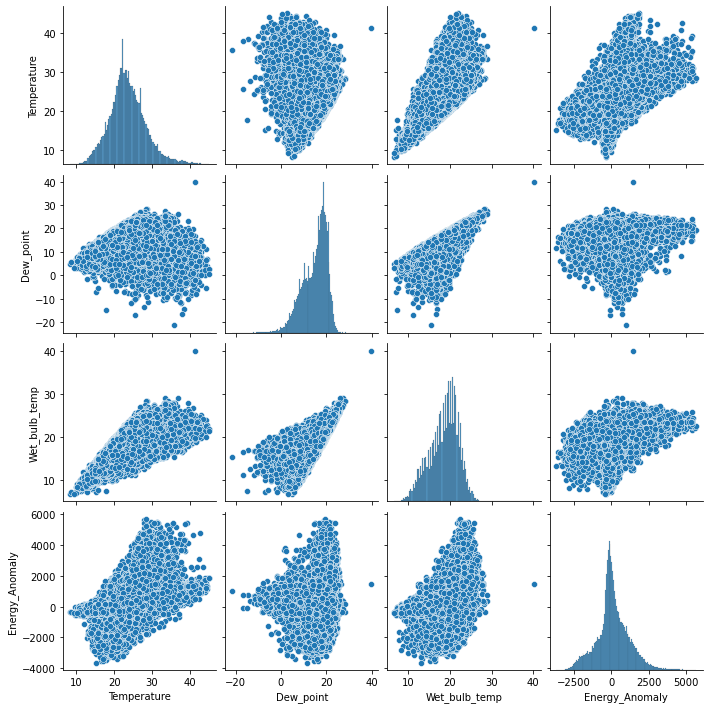

In [89]:
X = combined_summer[['Temperature', 'Dew_point', 'Wet_bulb_temp']]
y = combined_summer['Energy_Anomaly']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree = DecisionTreeRegressor(max_depth = None)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
accuracy = decision_tree.score(X_test, y_test)
print(f"mean squared error: {mse}")
print(f"accruacy: {accuracy}")

data = X_test.copy()
data['Energy_Anomaly'] = y_test
data.reset_index(drop=True, inplace=True)

sns.pairplot(data)
plt.show()

### Autumn tree

mean squared error: 717698.6400387799
accruacy: 0.08440357808308685


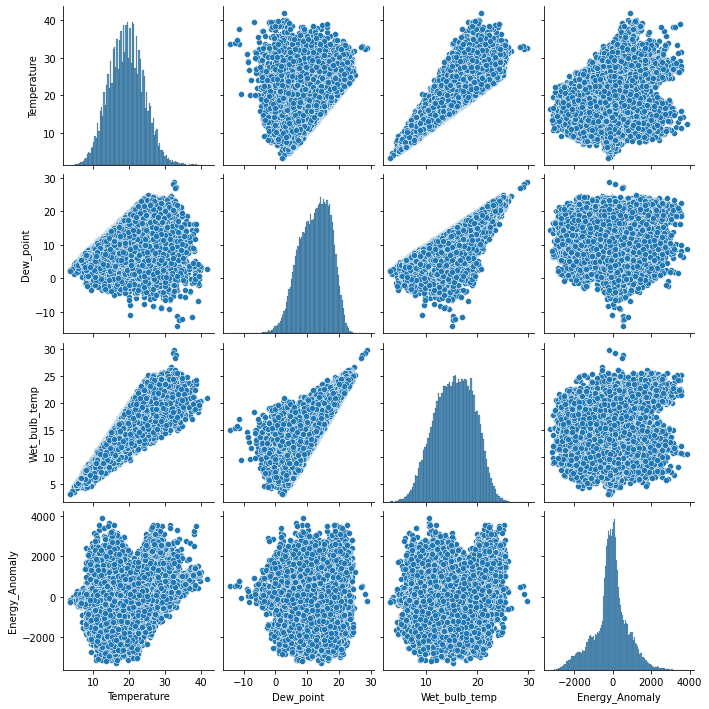

In [90]:
X1 = combined_autumn[['Temperature', 'Dew_point', 'Wet_bulb_temp']]
y1 = combined_autumn['Energy_Anomaly']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

decision_tree1 = DecisionTreeRegressor(max_depth = None)
decision_tree1.fit(X1_train, y1_train)

y1_pred = decision_tree1.predict(X1_test)

mse1 = mean_squared_error(y1_test, y1_pred)
accuracy1 = decision_tree1.score(X1_test, y1_test)
print(f"mean squared error: {mse1}")
print(f"accruacy: {accuracy1}")


data1 = X1_test.copy()
data1['Energy_Anomaly'] = y1_test
data1.reset_index(drop=True, inplace=True)

sns.pairplot(data1)
plt.show()

### Winter tree

mean squared error: 964164.3130438516
accruacy: -0.03560064326048429


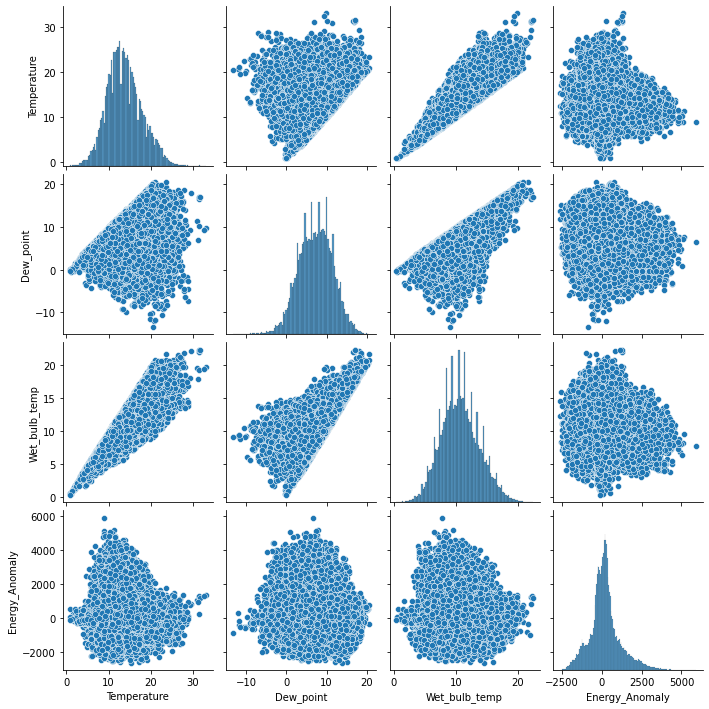

In [91]:
X2 = combined_winter[['Temperature', 'Dew_point', 'Wet_bulb_temp']]
y2 = combined_winter['Energy_Anomaly']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

decision_tree2 = DecisionTreeRegressor(max_depth = None)
decision_tree2.fit(X2_train, y2_train)

y2_pred = decision_tree2.predict(X2_test)

mse2 = mean_squared_error(y2_test, y2_pred)
accuracy2 = decision_tree2.score(X2_test, y2_test)
print(f"mean squared error: {mse2}")
print(f"accruacy: {accuracy2}")


data2 = X2_test.copy()
data2['Energy_Anomaly'] = y2_test
data2.reset_index(drop=True, inplace=True)

sns.pairplot(data2)
plt.show()

### Spring tree

mean squared error: 664037.4437202343
accruacy: 0.07009569146928818


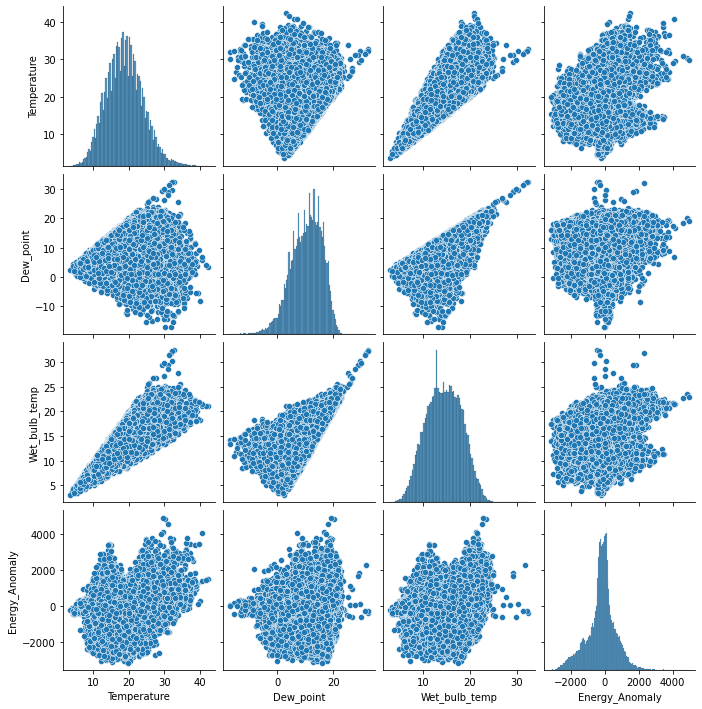

In [92]:
X3 = combined_spring[['Temperature', 'Dew_point', 'Wet_bulb_temp']]
y3 = combined_spring['Energy_Anomaly']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

decision_tree3 = DecisionTreeRegressor(max_depth = None)
decision_tree3.fit(X3_train, y3_train)

y3_pred = decision_tree3.predict(X3_test)

mse3 = mean_squared_error(y3_test, y3_pred)
accuracy3 = decision_tree3.score(X3_test, y3_test)
print(f"mean squared error: {mse3}")
print(f"accruacy: {accuracy3}")


data3 = X3_test.copy()
data3['Energy_Anomaly'] = y3_test
data3.reset_index(drop=True, inplace=True)

sns.pairplot(data3)
plt.show()

# Multi-linear regression (not good, relationship not linear)

In [93]:
combined_summer['Temperature^2'] = combined_summer['Temperature']*combined_summer['Temperature']
combined_autumn['Temperature^2'] = combined_autumn['Temperature']*combined_autumn['Temperature']
combined_winter['Temperature^2'] = combined_winter['Temperature']*combined_winter['Temperature']
combined_spring['Temperature^2'] = combined_spring['Temperature']*combined_spring['Temperature']

### Multi-linear (Summer, all 3 states)

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = combined_summer[['Temperature', 'Temperature^2', 'Dew_point', 'Wet_bulb_temp']]
y = combined_summer['Energy_Anomaly']
nX = (X-X.mean()) / X.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

summer_linearreg = LinearRegression(fit_intercept = True)
summer_linearreg.fit(X_train, y_train)

gradients = summer_linearreg.coef_
optimal_intercept = summer_linearreg.intercept_
y_pred = summer_linearreg.predict(X_test)

print(f"Model: y = {round(gradients[0], 2)}(temp) + {round(gradients[1], 2)}(temp^2) + {round(gradients[2], 2)}(Dew point) + {round(gradients[3], 2)}(Wet bulb temp) + {round(optimal_intercept, 2)}")
print(f"Accuracy score: {r2_score(y_test, y_pred)}")

Model: y = 233.44(temp) + 0.62(temp^2) + 188.55(Dew point) + -364.84(Wet bulb temp) + -1767.1
Accuracy score: 0.2682123665900532


### Multi-linear (Autumn, all 3 states)

In [95]:
X1 = combined_autumn[['Temperature', 'Temperature^2', 'Dew_point', 'Wet_bulb_temp']]
y1 = combined_autumn['Energy_Anomaly']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 3)

autumn_linearreg = LinearRegression(fit_intercept = True)
autumn_linearreg.fit(X1_train, y1_train)

gradients1 = autumn_linearreg.coef_
optimal_intercept1 = autumn_linearreg.intercept_
y1_pred = summer_linearreg.predict(X1_test)

print(f"Model: y = {round(gradients1[0], 2)}(temp) + {round(gradients1[1], 2)}(temp^2) + {round(gradients1[2], 2)}(Dew point) + {round(gradients1[3], 2)}(Wet bulb temp) + {round(optimal_intercept1, 2)}")
print(f"Accuracy score: {r2_score(y1_test, y1_pred)}")

Model: y = 77.49(temp) + 2.92(temp^2) + 130.4(Dew point) + -305.99(Wet bulb temp) + 380.04
Accuracy score: -0.08505462388639962


### Multi-linear (Winter, all 3 states)

In [97]:
X2 = combined_winter[['Temperature', 'Temperature^2', 'Dew_point', 'Wet_bulb_temp']]
y2 = combined_winter['Energy_Anomaly']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 3)

winter_linearreg = LinearRegression(fit_intercept = True)
winter_linearreg.fit(X2_train, y2_train)

gradients2 = winter_linearreg.coef_
optimal_intercept2 = winter_linearreg.intercept_
y1_pred = summer_linearreg.predict(X1_test)

print(f"Model: y = {round(gradients2[0], 2)}(temp) + {round(gradients2[1], 2)}(temp^2) + {round(gradients2[2], 2)}(Dew point) + {round(gradients2[3], 2)}(Wet bulb temp) + {round(optimal_intercept2, 2)}")
print(f"Accuracy score: {r2_score(y1_test, y1_pred)}")

Model: y = 413.83(temp) + -7.99(temp^2) + 115.11(Dew point) + -334.68(Wet bulb temp) + -1116.37
Accuracy score: -0.08505462388639962


### Multi-Linear (Spring, all 3 states)

In [99]:
X3 = combined_spring[['Temperature', 'Temperature^2', 'Dew_point', 'Wet_bulb_temp']]
y3 = combined_spring['Energy_Anomaly']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state = 3)

spring_linearreg = LinearRegression(fit_intercept = True)
spring_linearreg.fit(X3_train, y3_train)

gradients3 = spring_linearreg.coef_
optimal_intercept3 = spring_linearreg.intercept_
y3_pred = summer_linearreg.predict(X3_test)

print(f"Model: y = {round(gradients3[0], 2)}(temp) + {round(gradients3[1], 2)}(temp^2) + {round(gradients3[2], 2)}(Dew point) + {round(gradients3[3], 2)}(Wet bulb temp) + {round(optimal_intercept3, 2)}")
print(f"Accuracy score: {r2_score(y3_test, y3_pred)}")

Model: y = 59.25(temp) + 2.8(temp^2) + 111.4(Dew point) + -256.41(Wet bulb temp) + 169.47
Accuracy score: -0.09804003870945999


# Support vector machines

### Support vector - Summer

mean squared error 824249.7789753308


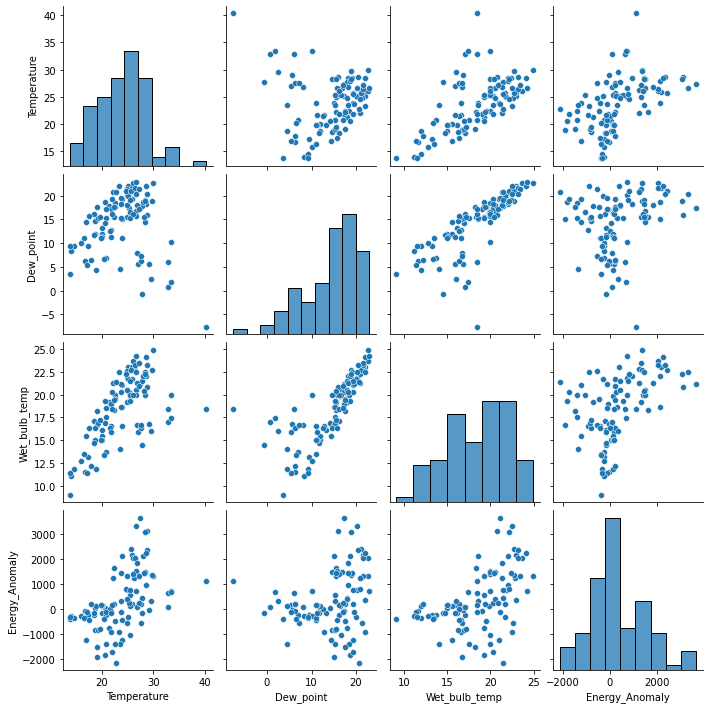

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

sample_summer = combined_summer.sample(frac = 0.002, random_state = 42)
X = sample_summer[['Temperature', 'Dew_point', 'Wet_bulb_temp']].values
y = sample_summer['Energy_Anomaly'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVR(kernel = 'rbf', gamma = 'auto')


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_C = grid_search.best_params_['C']

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_gamma = grid_search.best_params_['gamma']

svm = SVR(kernel = 'rbf', C = best_C, gamma = best_gamma)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"mean squared error {mse}")


X_test_df = pd.DataFrame(X_test, columns=['Temperature', 'Dew_point', 'Wet_bulb_temp'])
y_test_df = pd.Series(y_test, name='Energy_Anomaly')

sup_data = pd.concat([X_test_df, y_test_df], axis=1)

sns.pairplot(sup_data)
plt.show()

### Support vector - Autumn

mean squared error 760070.1464125145


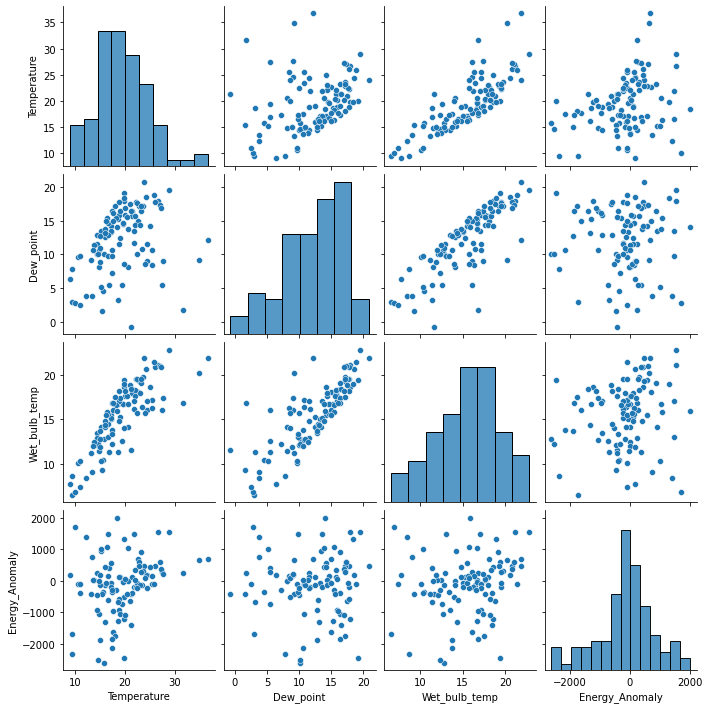

In [127]:
sample_autumn = combined_autumn.sample(frac = 0.002, random_state = 42)
X1 = sample_autumn[['Temperature', 'Dew_point', 'Wet_bulb_temp']].values
y1 = sample_autumn['Energy_Anomaly'].values

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

svm1 = SVR(kernel = 'rbf', gamma = 'auto')


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X1_train, y1_train)
best_C = grid_search.best_params_['C']

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_gamma = grid_search.best_params_['gamma']

svm1 = SVR(kernel = 'rbf', C = best_C, gamma = best_gamma)
svm1.fit(X1_train, y1_train)

y1_pred = svm1.predict(X1_test)

mse1 = mean_squared_error(y1_test, y1_pred)
print(f"mean squared error {mse1}")


X1_test_df = pd.DataFrame(X1_test, columns=['Temperature', 'Dew_point', 'Wet_bulb_temp'])
y1_test_df = pd.Series(y1_test, name='Energy_Anomaly')

sup_data1 = pd.concat([X1_test_df, y1_test_df], axis=1)

sns.pairplot(sup_data1)
plt.show()

### Support vector - Winter

mean squared error 1012156.9581649648


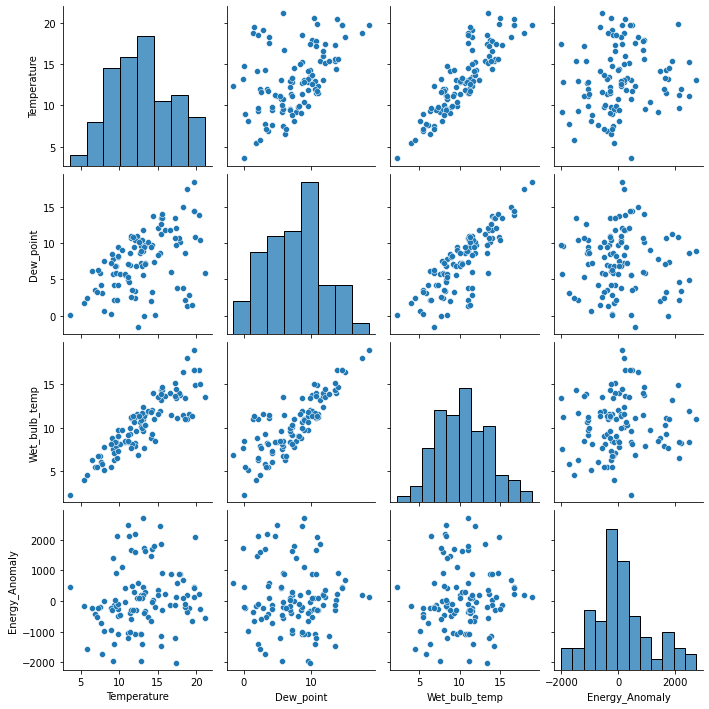

In [128]:
sample_winter = combined_winter.sample(frac = 0.002, random_state = 42)
X2 = sample_winter[['Temperature', 'Dew_point', 'Wet_bulb_temp']].values
y2 = sample_winter['Energy_Anomaly'].values

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

svm2 = SVR(kernel = 'rbf', gamma = 'auto')


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_C = grid_search.best_params_['C']

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_gamma = grid_search.best_params_['gamma']

svm2 = SVR(kernel = 'rbf', C = best_C, gamma = best_gamma)
svm2.fit(X2_train, y2_train)

y2_pred = svm2.predict(X2_test)

mse2 = mean_squared_error(y2_test, y2_pred)
print(f"mean squared error {mse2}")


X2_test_df = pd.DataFrame(X2_test, columns=['Temperature', 'Dew_point', 'Wet_bulb_temp'])
y2_test_df = pd.Series(y2_test, name='Energy_Anomaly')

sup_data2 = pd.concat([X2_test_df, y2_test_df], axis=1)

sns.pairplot(sup_data2)
plt.show()

### Support vector -  Spring

mean squared error 596291.5877483867


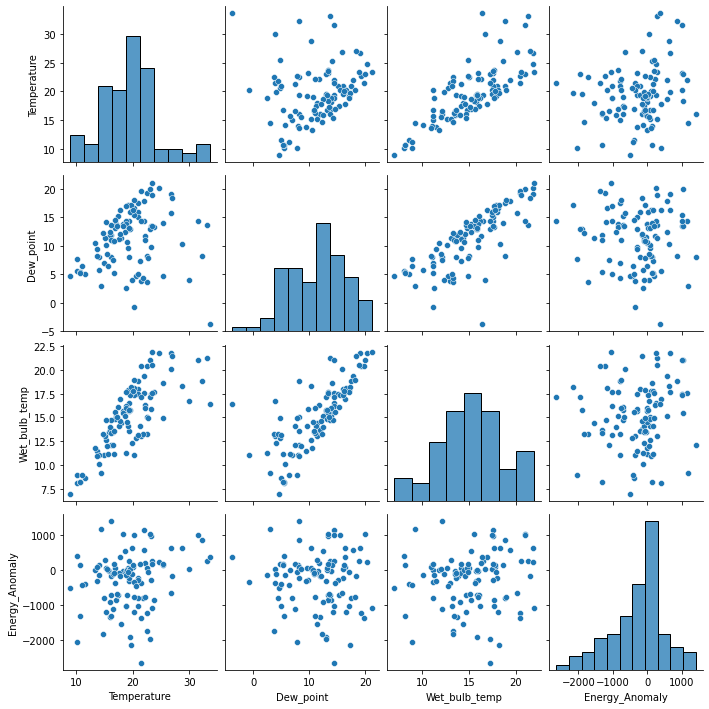

In [129]:
sample_spring = combined_spring.sample(frac = 0.002, random_state = 42)
X3 = sample_spring[['Temperature', 'Dew_point', 'Wet_bulb_temp']].values
y3 = sample_spring['Energy_Anomaly'].values

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

svm3 = SVR(kernel = 'rbf', gamma = 'auto')


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_C = grid_search.best_params_['C']

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_gamma = grid_search.best_params_['gamma']

svm3 = SVR(kernel = 'rbf', C = best_C, gamma = best_gamma)
svm3.fit(X3_train, y3_train)

y3_pred = svm3.predict(X3_test)

mse3 = mean_squared_error(y3_test, y3_pred)
print(f"mean squared error {mse3}")


X3_test_df = pd.DataFrame(X3_test, columns=['Temperature', 'Dew_point', 'Wet_bulb_temp'])
y3_test_df = pd.Series(y3_test, name='Energy_Anomaly')

sup_data3 = pd.concat([X3_test_df, y3_test_df], axis=1)

sns.pairplot(sup_data3)
plt.show()